# <div style="color:yellow" > 1. EDA </div>


## <div style="color:yellow" > 1.0 Analyzing initial dataset </div>

In [238]:
"""Required imports"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


In [3]:
os.chdir("/Users/joaohenriques/Desktop/Mestrados/Data Science Nova IMS/My docs/Machine Learning/Project/projec_data")

In [4]:
os.getcwd()

'/Users/joaohenriques/Desktop/Mestrados/Data Science Nova IMS/My docs/Machine Learning/Project/project_data'

In [5]:
"""Importing and visualizing train dataset"""
df_train = pd.read_csv("train_data.csv")
df_train.head()

/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/1123791703.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train_data.csv")


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [11]:
"""Importing and visualizing test_data"""
df_test = pd.read_csv("test_data.csv")
df_test.head()


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.0,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.0,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5


In [ ]:
"""Train seems to have 2 more non-target variables compared to the test set. It would be expected to have 1 less feature (target variable)."""
train_features = list(df_train.columns)
test_features = list(df_test.columns)
print(f" The train and test number of features is respectively {len(train_features)} and {len(test_features)} ")

 The train and test number of features is respectively 33 and 30 


In [ ]:
"""Checking train features not present in test data and the other way around"""
train_feat_not_in_test = [element for element in train_features if element not in test_features]
test_feat_not_in_train = [element for element in test_features if element not in train_features]

if len(train_feat_not_in_test) != 0:
    print("Train set features not in test set:")
    print (train_feat_not_in_test)

if len(test_feat_not_in_train) != 0:
    print(test_feat_not_in_train)


Train set features not in test set:
['Claim Injury Type', 'Agreement Reached', 'WCB Decision']


In [16]:
"""Since 'WCB decision' and 'Agreement Reached' not present in the test data, we will drop the features"""
df_train.drop(columns=['Agreement Reached','WCB Decision'], inplace= True)

In [17]:
"""Total num of rows and columns"""
number_obs = df_train.shape[0]
df_train.shape

(593471, 31)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [19]:
"""Number of duplicate values"""
int(df_train.duplicated().sum())

0

In [ ]:
"""NaN values"""
na_values = df_train.isnull().sum()
na_values


Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

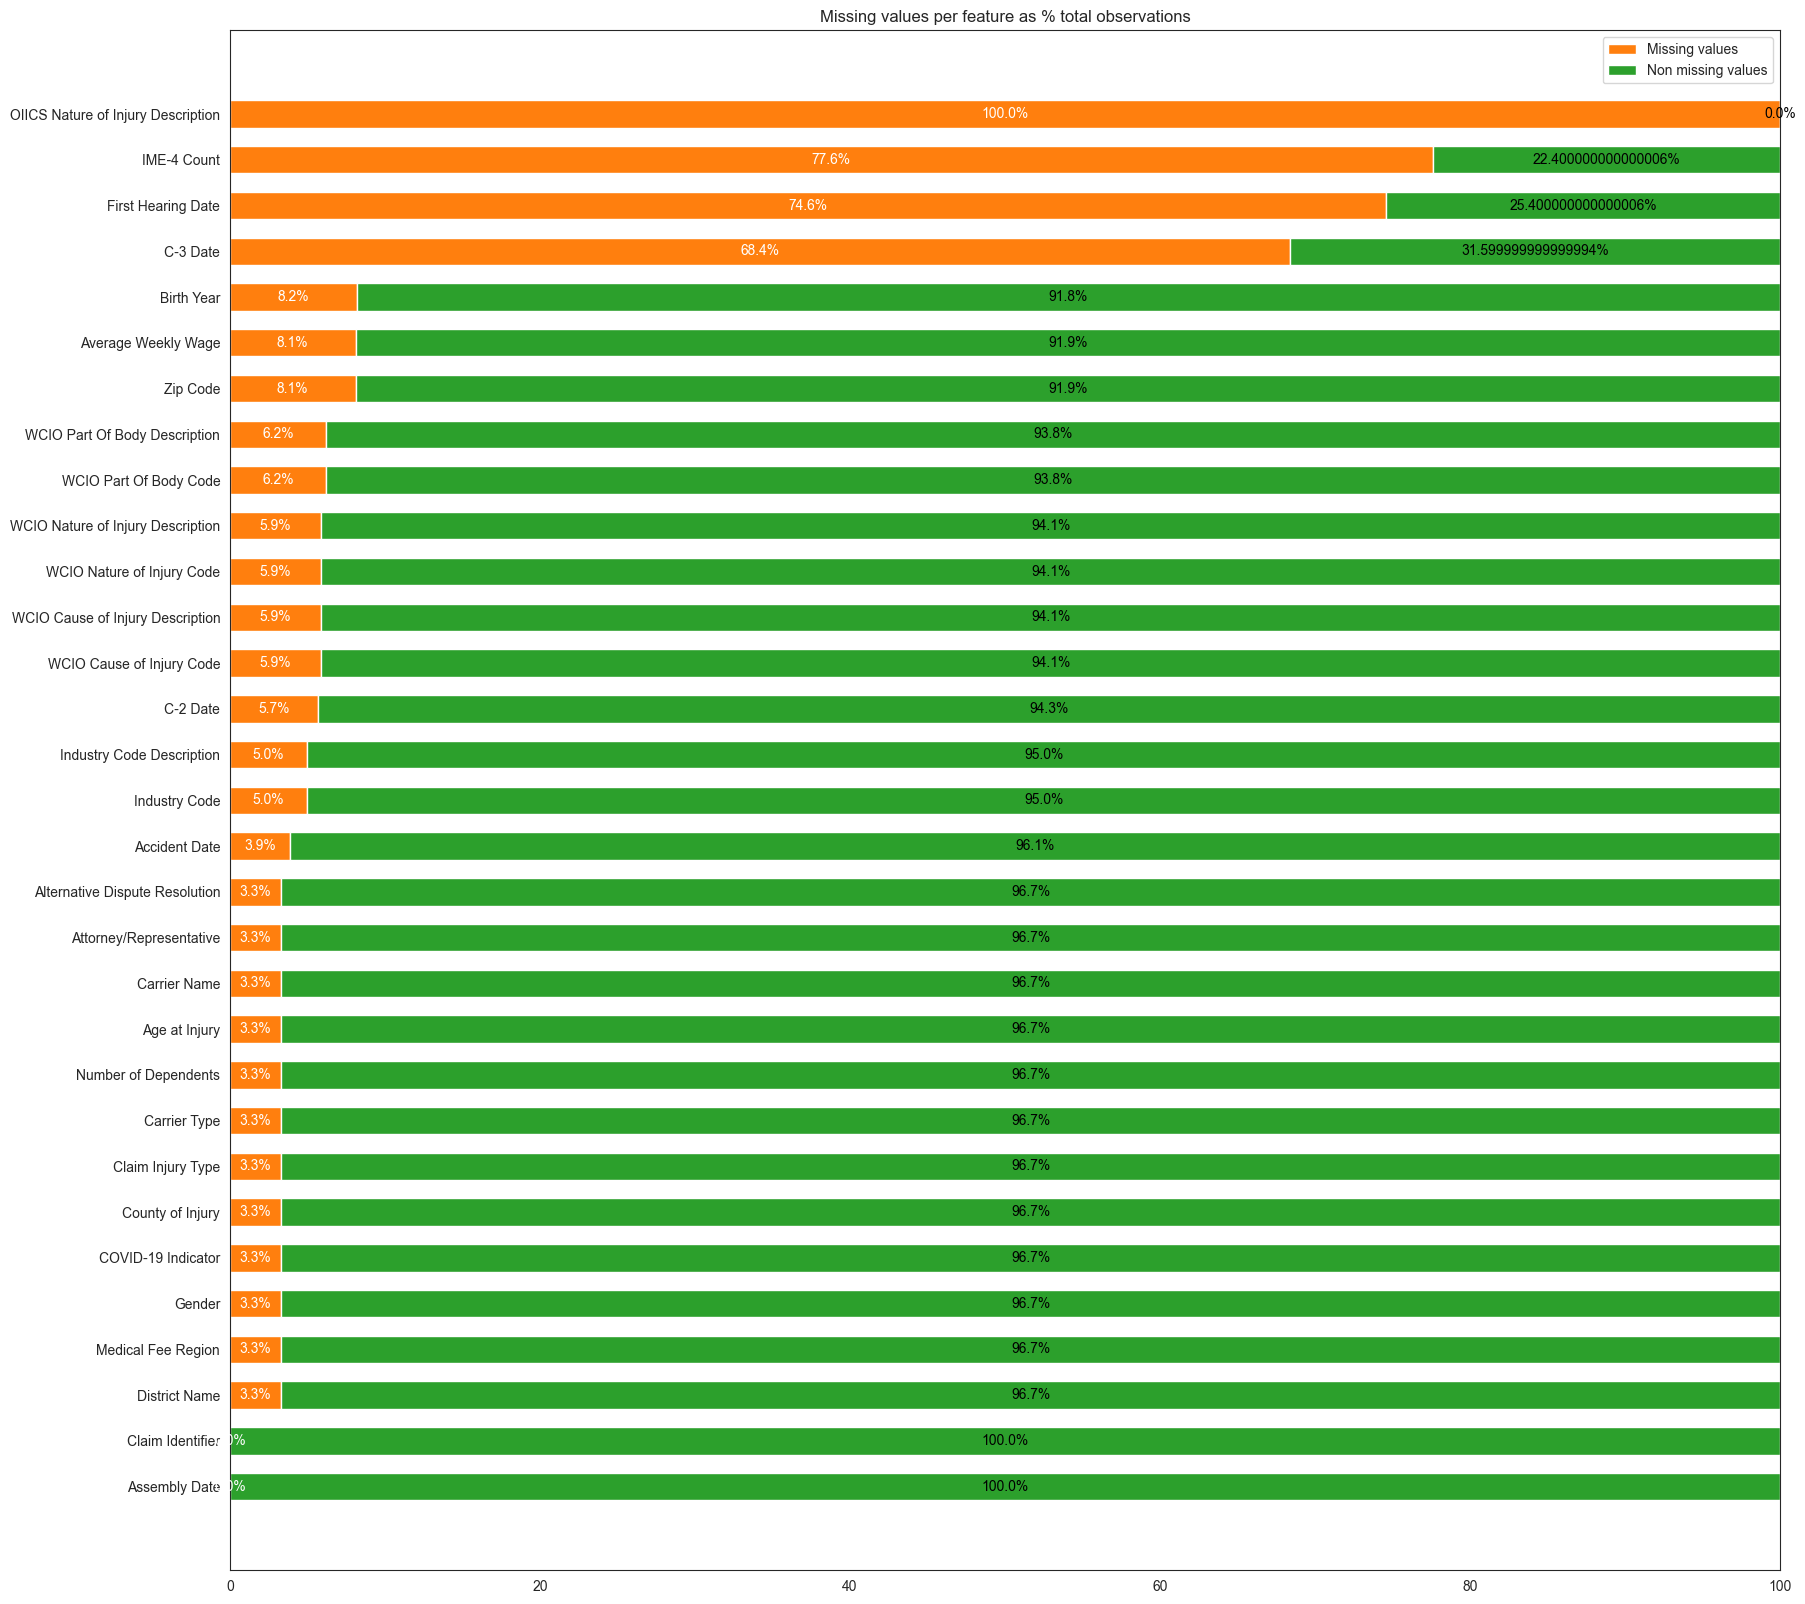

In [119]:
"""NaN values for each column as % total obervations"""
percentage_missing = round((df_train.isnull().sum() / number_obs)*100,1)
percentage_missing.sort_values(ascending=True, inplace= True)

percentage_missing_df = pd.DataFrame({"missing_values_(%)": percentage_missing})
percentage_missing_df["present_values_(%)"] = abs(percentage_missing_df["missing_values_(%)"] - 100)
percentage_present = percentage_missing_df["present_values_(%)"]
column_names = list(percentage_missing.index)

fig,ax = plt.subplots (figsize = (20,20))
p1 = ax.barh(y=column_names, width=percentage_missing, height= 0.6, color="tab:orange", label="Missing values")
p2 = ax.barh(y=column_names, width=percentage_present, height= 0.6, color="tab:green", left=percentage_missing, label= "Non missing values")
ax.bar_label(p1, labels= [str(element) + "%" for element in percentage_missing], color="white", label_type="center")
ax.bar_label(p2, labels= [str(element) + "%" for element in percentage_present], color="black", label_type="center")
ax.legend()
ax.set_title("Missing values per feature as % total observations")
plt.show()



### Key Notes
1. Dropped 'Agreement Reached' and 'WCB Decision' features from train dataset since they were not present in the test dataset
2. Total of 593,471 observation and 30 non target features
3. No duplicate values registred
4. Regarding NA values, important to note the following features and respective percentage of NaN values: 
    - OIICS Nature of Injury Description (100%)
    - IME-4 Count(75%)
    - First Hearing Date (75%)
    - C-3 Date (68%)


## <div style="color:yellow" > 1.1 Individual feature analysis </div>

- Accident Date
- C-2 Date
- C-3 Date
- Assembly date 
- First Hearing Date
- OIICS Nature of Injury Description
- Claim Injury Type

## a) Accident date

In [48]:
"""Undertanding the feature"""
df_train["Accident Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: Accident Date
Non-Null Count   Dtype 
--------------   ----- 
570337 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


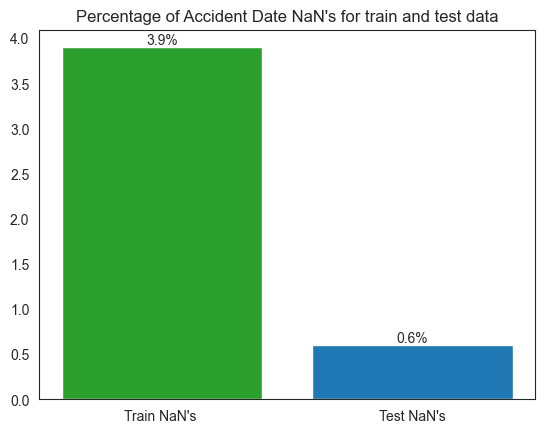

In [118]:
"""Number of NaN Values"""
df_train["Accident Date"].isnull().sum()

sns.set_style("white")


acci_date_train_na = df_train["Accident Date"].isnull().sum()
acci_date_test_na = df_test["Accident Date"].isnull().sum()

#total_values_train = df_train["Accident Date"].count()
#total_values_test = df_test["Accident Date"].count()

total_values_train = len(df_train["Accident Date"])
total_values_test = len(df_test["Accident Date"])

fig, ax = plt.subplots()
x_values = ["Train NaN's ", "Test NaN's"]
bar_colours = ["tab:green", "tab:blue"]

y_values = [round((acci_date_train_na/total_values_train)*100, 1), round((acci_date_test_na/total_values_test)*100, 1)]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])
ax.set_title("Percentage of Accident Date NaN's for train and test data")

plt.show()

In [70]:
"""Possible Hidden NaN values"""
df_train["Accident Date"].unique()


array(['2019-12-30', '2019-08-30', '2019-12-06', ..., '2000-05-24',
       '2007-05-01', '1980-05-17'], dtype=object)

In [90]:
"""Changing format from string to datetime value"""
df_train["Accident Date"] = pd.to_datetime(df_train["Accident Date"], format='%Y-%m-%d')
df_test["Accident Date"] = pd.to_datetime(df_test["Accident Date"], format='%Y-%m-%d')


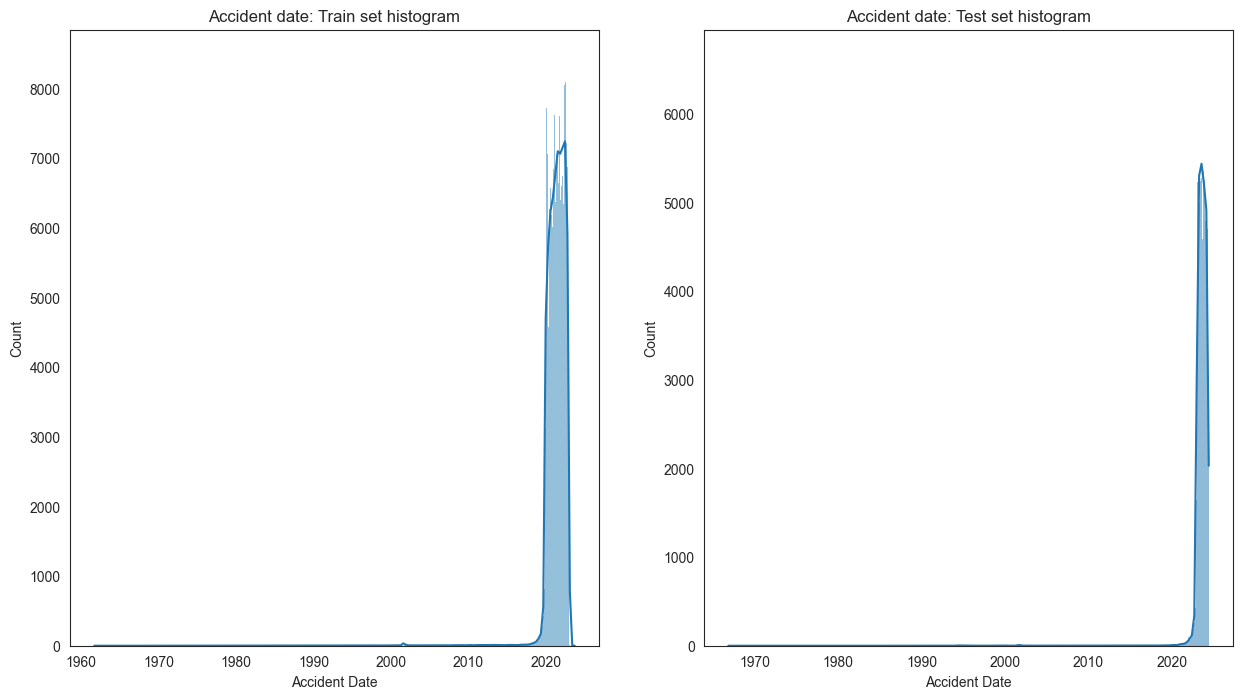

In [92]:
"""Histogram for both train and test data"""

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
sns.histplot(df_train["Accident Date"], kde=True, ax=axes[0])
sns.histplot(df_test["Accident Date"], kde=True, ax=axes[1])

axes[0].set_title("Accident date: Train set histogram")
axes[1].set_title("Accident date: Test set histogram")
plt.show()

Text(0.5, 1.0, 'Accident date: Boxplot Test set')

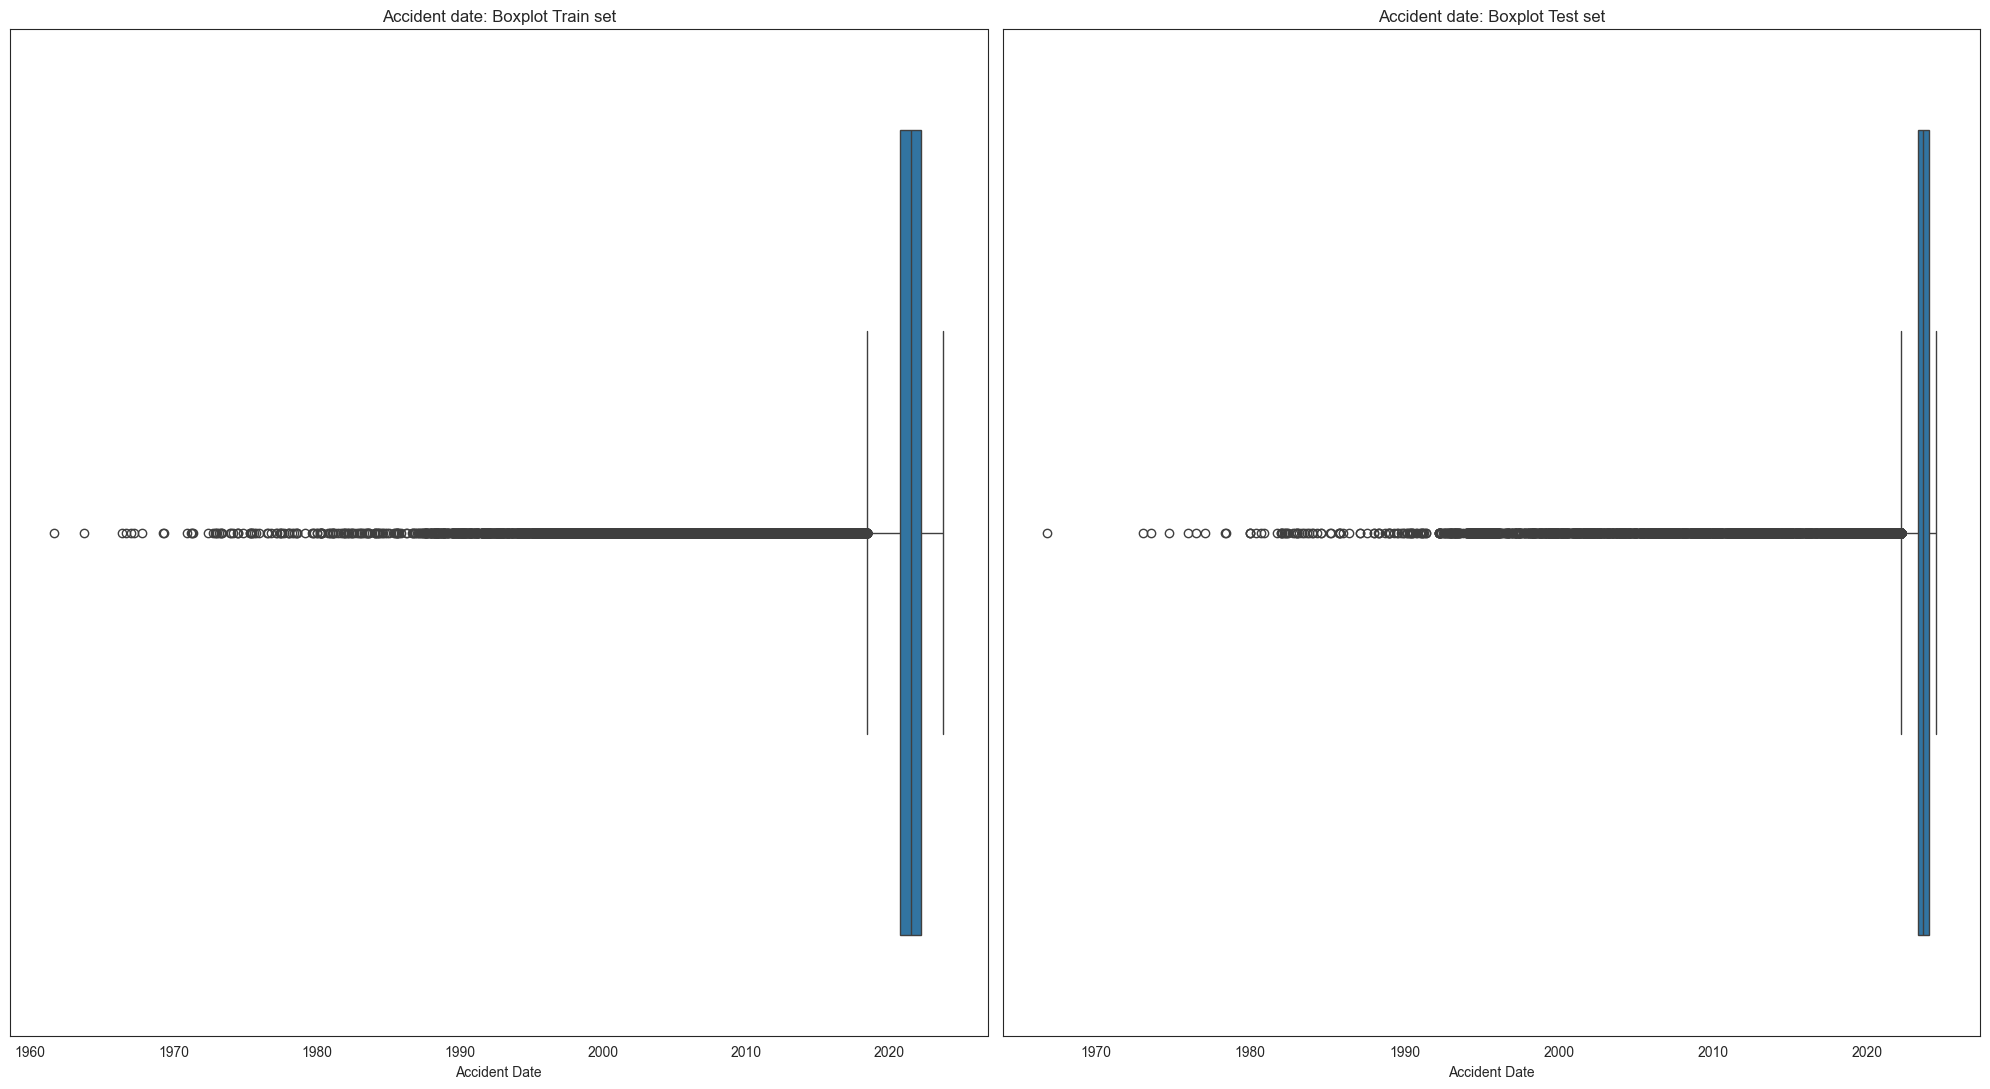

In [93]:
"""Boxplot for both train and test data"""

num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11),tight_layout=True)

sns.boxplot(x = df_train["Accident Date"], ax=axes[0])
sns.boxplot(x = df_test["Accident Date"], ax=axes[1])

axes[0].set_title("Accident date: Boxplot Train set")
axes[1].set_title("Accident date: Boxplot Test set")


/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/3660729980.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_train_resampled = df_train.resample('Y', on='Accident Date').size()
/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/3660729980.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_test_resampled = df_test.resample('Y', on='Accident Date').size()


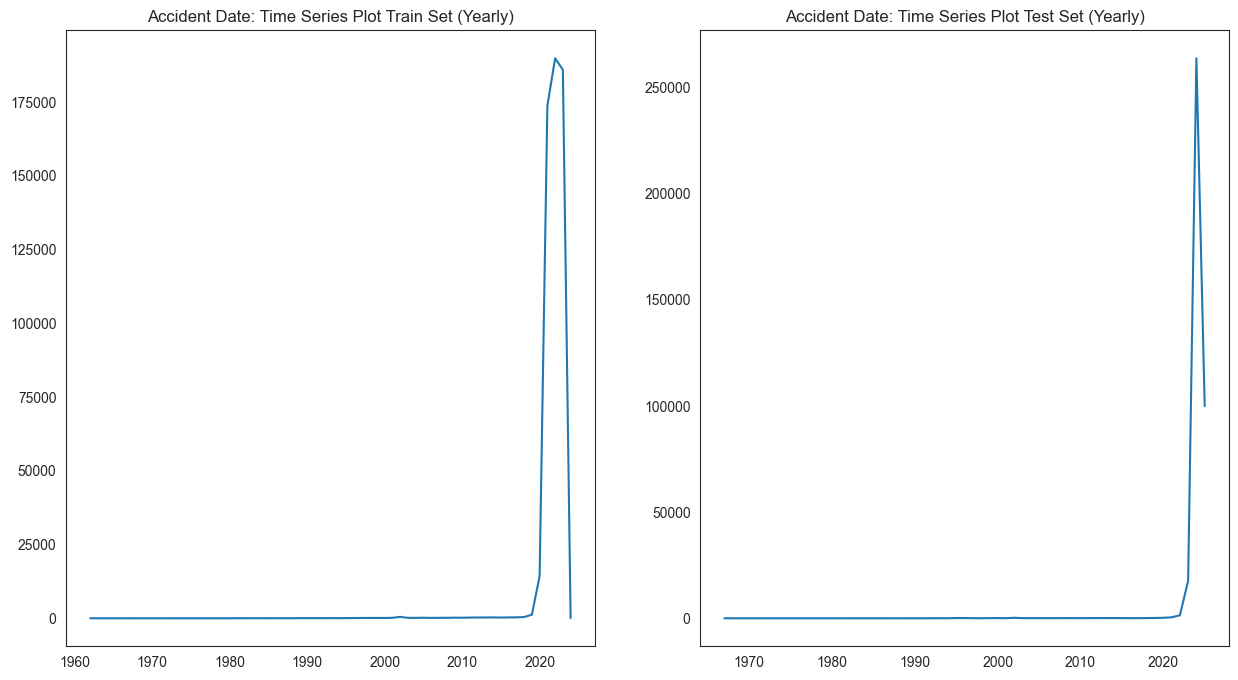

In [111]:
"""Creating time series plot and resamplyingin regards to year"""

# Resample by month and count the occurrences
df_train_resampled = df_train.resample('Y', on='Accident Date').size()
df_test_resampled = df_test.resample('Y', on='Accident Date').size()

# Plot the resampled data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

axes[0].plot(df_train_resampled.index, df_train_resampled)
axes[1].plot(df_test_resampled.index, df_test_resampled)

axes[0].set_title("Accident Date: Time Series Plot Train Set (Yearly)")
axes[1].set_title("Accident Date: Time Series Plot Test Set (Yearly)")

plt.show()


In [ ]:
"""Analyze the outliers exclusively and then analysing the feature again without them? """

#TO DO 

### Key notes
1. % of NaN values ia higher in the train dataset compared to the test dataset
2. No hidden NaN values
3. No apparent strange values (still need to compare with C-2, C-3 Date and Assembly Date)
4. Changed data format from object to datetime
5. Histogram and Boxplot on both training and test datasets is highly skewed due to the existance of negative outliers
6. Time series plot seems very similar to Histogram

## b) <b >C-2 Date </b>

In [103]:
"""Undertanding the feature"""
df_train["C-2 Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: C-2 Date
Non-Null Count   Dtype 
--------------   ----- 
559466 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


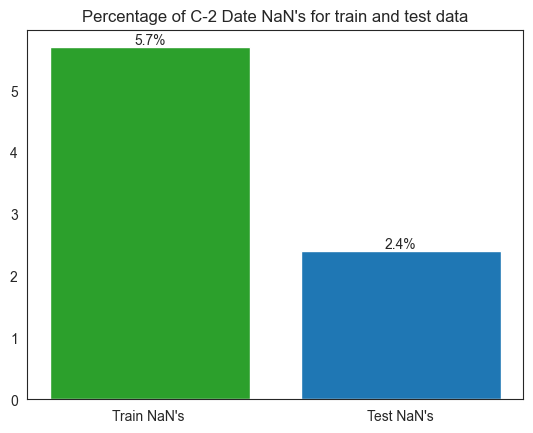

In [120]:
"""Number of NaN Values"""
df_train["C-2 Date"].isnull().sum()

sns.set_style("white")


c2_date_train_na = df_train["C-2 Date"].isnull().sum()
c2_date_test_na = df_test["C-2 Date"].isnull().sum()

total_values_train = len(df_train["C-2 Date"])
total_values_test = len(df_test["C-2 Date"])

fig, ax = plt.subplots()
x_values = ["Train NaN's ", "Test NaN's"]
bar_colours = ["tab:green", "tab:blue"]

y_values = [round((c2_date_train_na/total_values_train)*100, 1), round((c2_date_test_na/total_values_test)*100, 1)]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])
ax.set_title("Percentage of C-2 Date NaN's for train and test data")

plt.show()

In [105]:
"""Possible Hidden NaN values"""
df_train["C-2 Date"].unique()


array(['2019-12-31', '2020-01-01', nan, ..., '2023-05-31', '2023-06-27',
       '2024-01-19'], dtype=object)

In [107]:
"""Changing format from string to datetime value"""
df_train["C-2 Date"] = pd.to_datetime(df_train["C-2 Date"], format='%Y-%m-%d')
df_test["C-2 Date"] = pd.to_datetime(df_test["C-2 Date"], format='%Y-%m-%d')


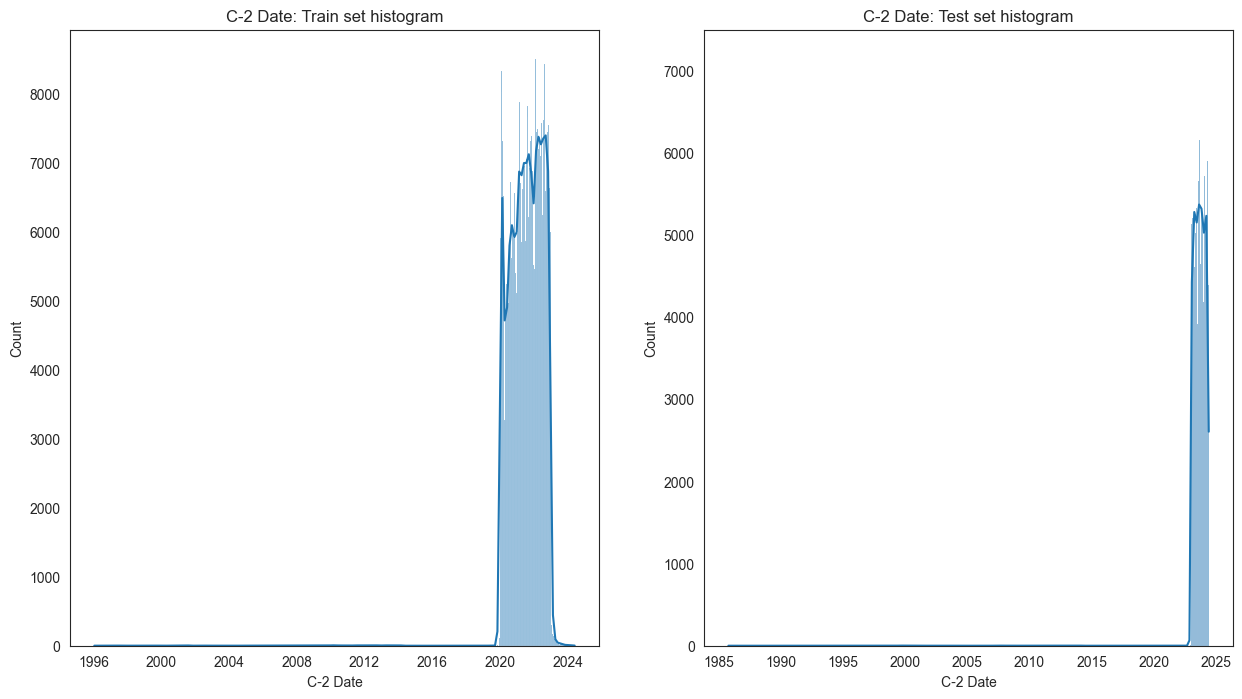

In [108]:
"""Histogram for both train and test data"""

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
sns.histplot(df_train["C-2 Date"], kde=True, ax=axes[0])
sns.histplot(df_test["C-2 Date"], kde=True, ax=axes[1])

axes[0].set_title("C-2 Date: Train set histogram")
axes[1].set_title("C-2 Date: Test set histogram")
plt.show()

Text(0.5, 1.0, 'C-2 Date: Boxplot Test set')

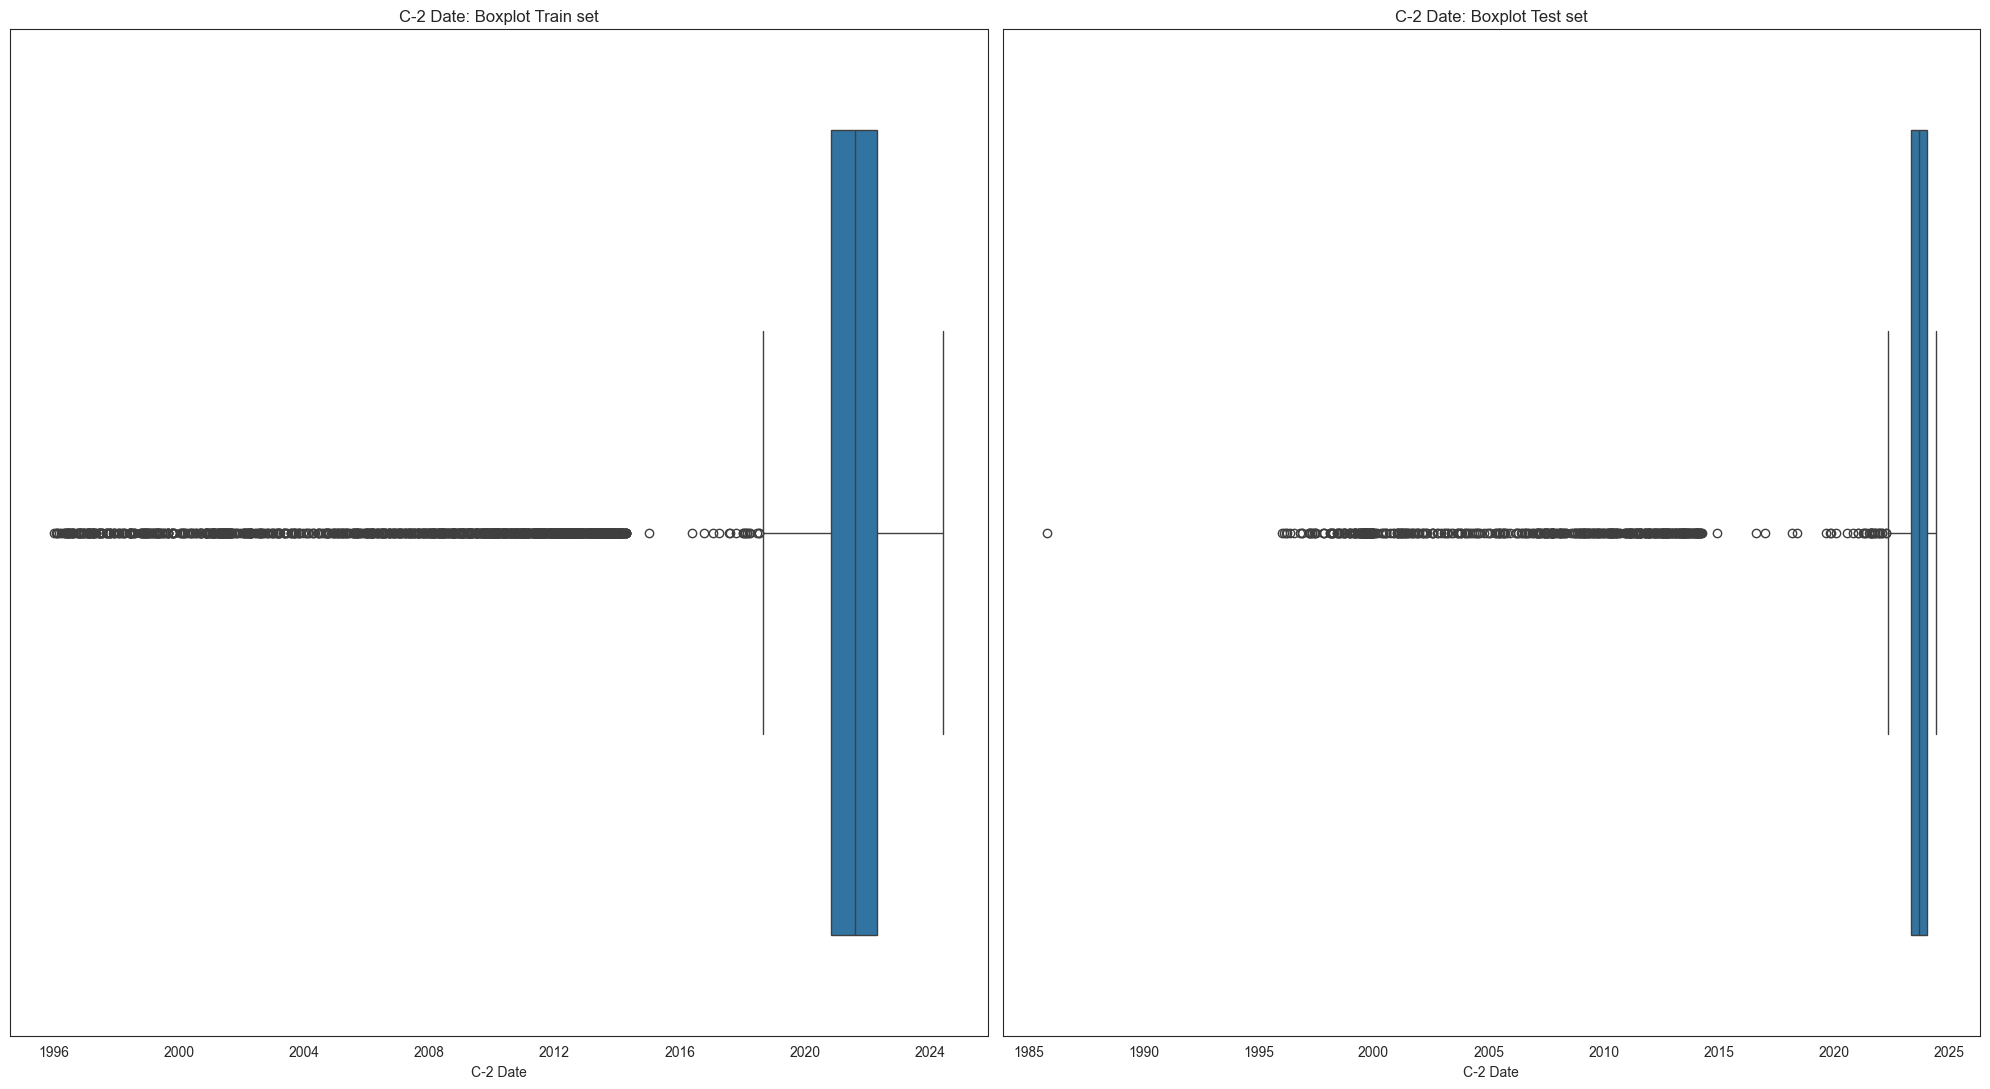

In [109]:
"""Boxplot for both train and test data"""

num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11),tight_layout=True)

sns.boxplot(x = df_train["C-2 Date"], ax=axes[0])
sns.boxplot(x = df_test["C-2 Date"], ax=axes[1])

axes[0].set_title("C-2 Date: Boxplot Train set")
axes[1].set_title("C-2 Date: Boxplot Test set")


/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/578145940.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_train_resampled = df_train.resample('Y', on='C-2 Date').size()
/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/578145940.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_test_resampled = df_test.resample('Y', on='C-2 Date').size()


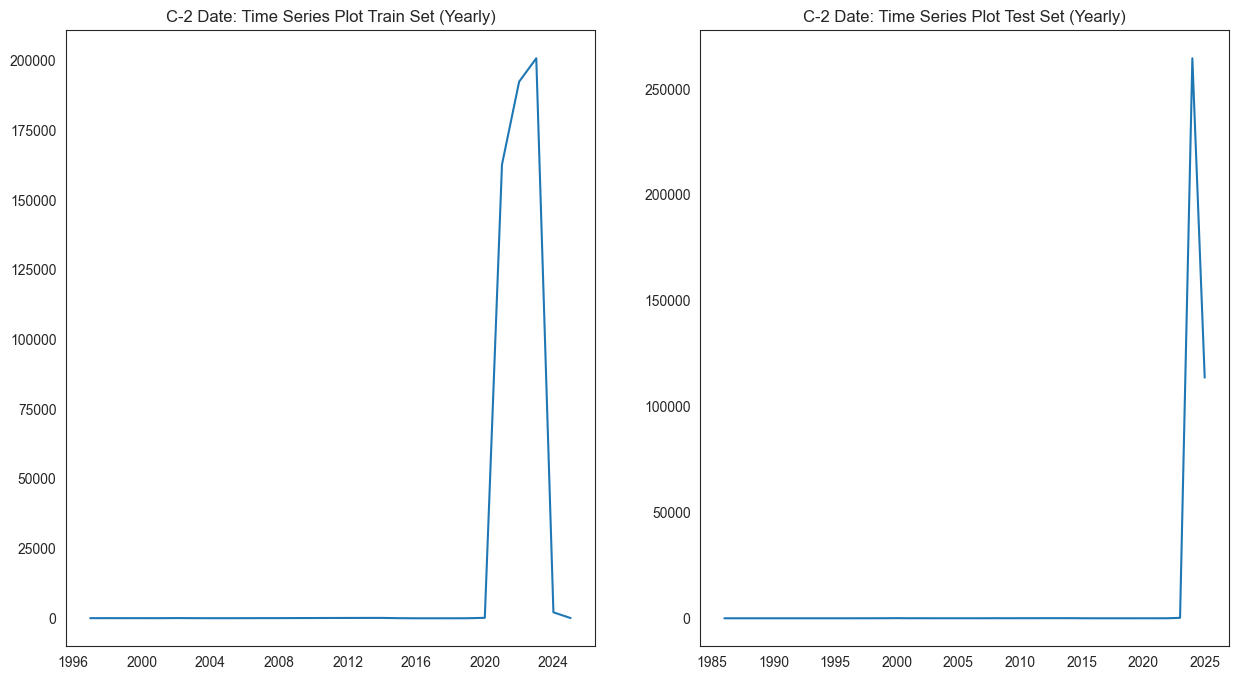

In [156]:
"""Creating time series plot and resamplyingin regards to year"""

# Resample by month and count the occurrences
df_train_resampled = df_train.resample('Y', on='C-2 Date').size()
df_test_resampled = df_test.resample('Y', on='C-2 Date').size()

# Plot the resampled data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

axes[0].plot(df_train_resampled.index, df_train_resampled)
axes[1].plot(df_test_resampled.index, df_test_resampled)

axes[0].set_title("C-2 Date: Time Series Plot Train Set (Yearly)")
axes[1].set_title("C-2 Date: Time Series Plot Test Set (Yearly)")

plt.show()


### Key notes on C-2 Date (similar analysis to 'Accident date')
1. % of NaN values ia higher in the train dataset compared to the test dataset
2. No hidden NaN values
3. No apparent strange values (still need to compare with C-2, C-3 Date and Assembly Date)
4. Changed data format from object to datetime
5. Histogram and Boxplot on both training and test datasets is highly skewed due to the existance of negative outliers


In [ ]:
"""Analyze the outliers exclusively and then analysing the feature again without them? """

#TO DO 

## c) <b> C-3 Date </b>

In [112]:
"""Undertanding the feature"""
df_train["C-3 Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: C-3 Date
Non-Null Count   Dtype 
--------------   ----- 
187245 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


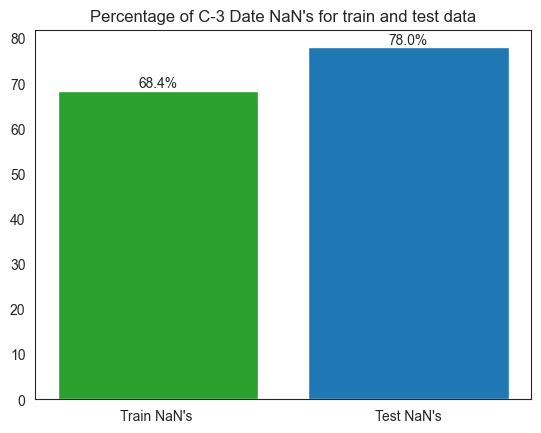

In [121]:
"""Number of NaN Values"""
df_train["C-3 Date"].isnull().sum()

sns.set_style("white")


c3_date_train_na = df_train["C-3 Date"].isnull().sum()
c3_date_test_na = df_test["C-3 Date"].isnull().sum()

total_values_train = len(df_train["C-3 Date"])
total_values_test = len(df_test["C-3 Date"])

fig, ax = plt.subplots()
x_values = ["Train NaN's ", "Test NaN's"]
bar_colours = ["tab:green", "tab:blue"]

y_values = [round((c3_date_train_na/total_values_train)*100, 1), round((c3_date_test_na/total_values_test)*100, 1)]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])
ax.set_title("Percentage of C-3 Date NaN's for train and test data")

plt.show()

In [122]:
"""Possible Hidden NaN values"""
df_train["C-3 Date"].unique()


array([nan, '2020-01-14', '2020-03-04', ..., '2023-08-19', '2023-05-06',
       '2023-02-04'], dtype=object)

In [123]:
"""Changing format from string to datetime value"""
df_train["C-3 Date"] = pd.to_datetime(df_train["C-3 Date"], format='%Y-%m-%d')
df_test["C-3 Date"] = pd.to_datetime(df_test["C-3 Date"], format='%Y-%m-%d')


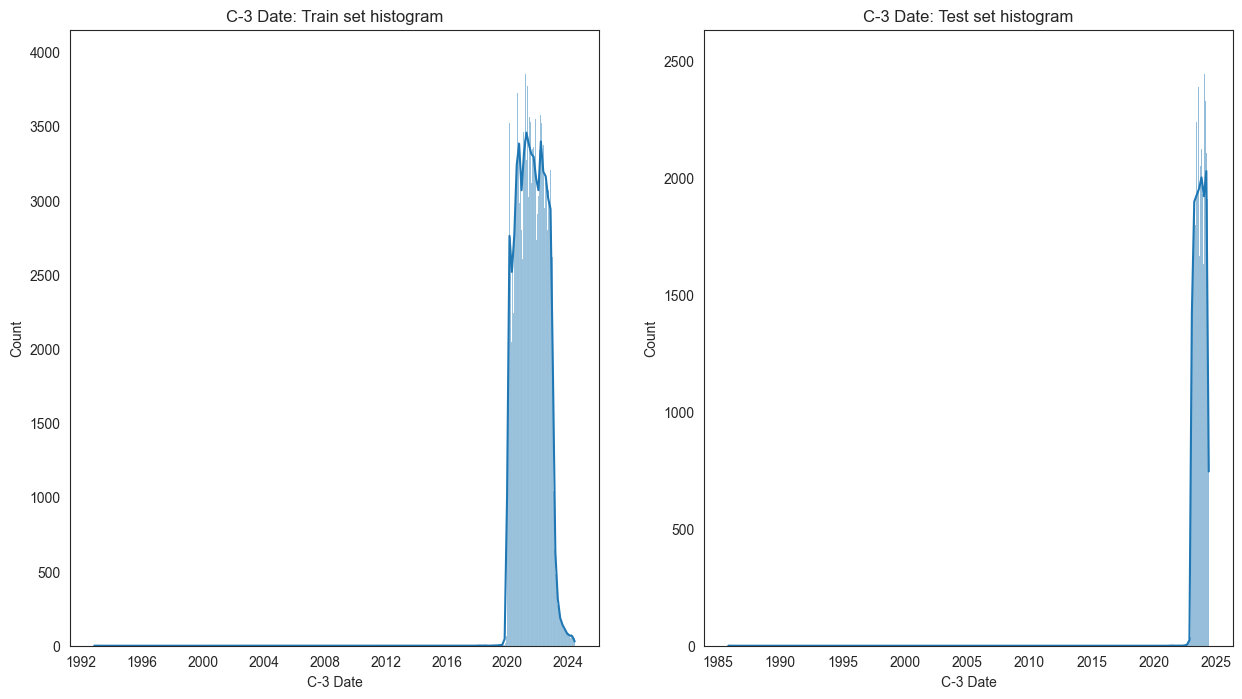

In [124]:
"""Histogram for both train and test data"""

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
sns.histplot(df_train["C-3 Date"], kde=True, ax=axes[0])
sns.histplot(df_test["C-3 Date"], kde=True, ax=axes[1])

axes[0].set_title("C-3 Date: Train set histogram")
axes[1].set_title("C-3 Date: Test set histogram")
plt.show()

Text(0.5, 1.0, 'C-3 Date: Boxplot Test set')

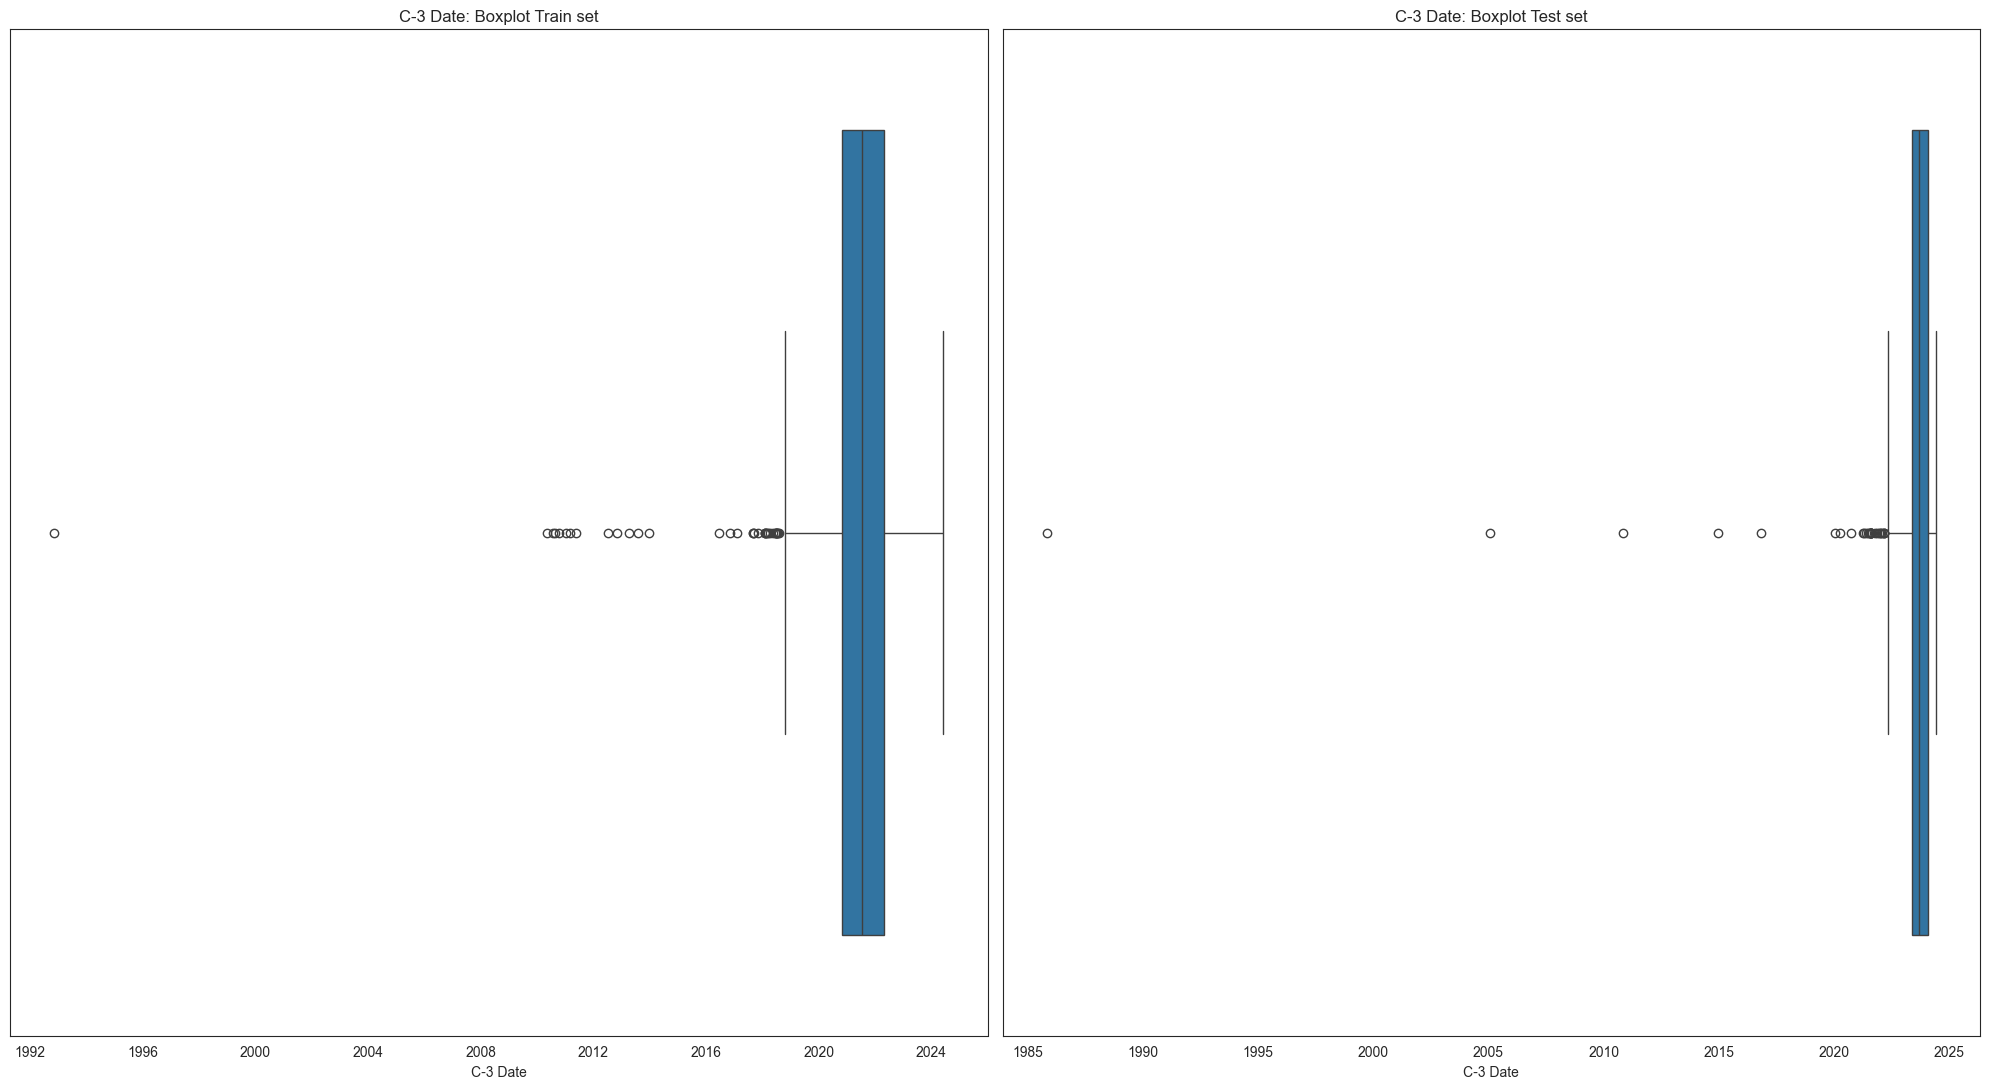

In [125]:
"""Boxplot for both train and test data"""

num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11),tight_layout=True)

sns.boxplot(x = df_train["C-3 Date"], ax=axes[0])
sns.boxplot(x = df_test["C-3 Date"], ax=axes[1])

axes[0].set_title("C-3 Date: Boxplot Train set")
axes[1].set_title("C-3 Date: Boxplot Test set")


/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/128576717.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_train_resampled = df_train.resample('Y', on='C-3 Date').size()
/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/128576717.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_test_resampled = df_test.resample('Y', on='C-3 Date').size()


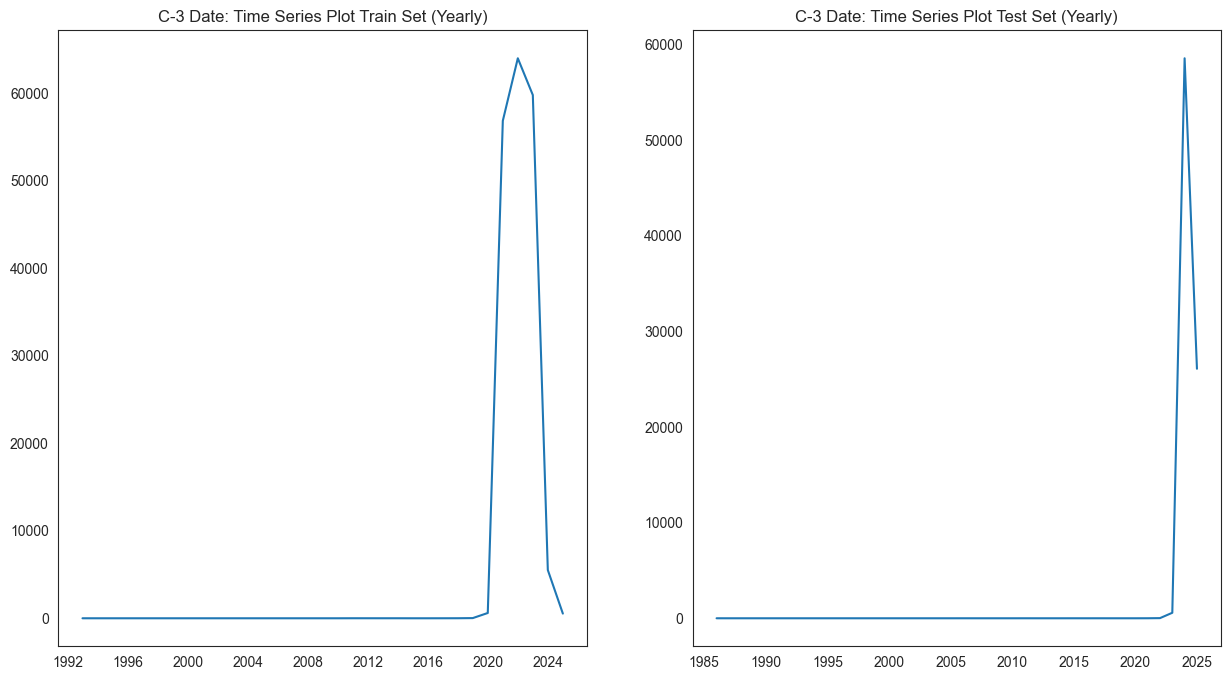

In [155]:
"""Creating time series plot and resamplyingin regards to year"""

# Resample by month and count the occurrences
df_train_resampled = df_train.resample('Y', on='C-3 Date').size()
df_test_resampled = df_test.resample('Y', on='C-3 Date').size()

# Plot the resampled data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

axes[0].plot(df_train_resampled.index, df_train_resampled)
axes[1].plot(df_test_resampled.index, df_test_resampled)

axes[0].set_title("C-3 Date: Time Series Plot Train Set (Yearly)")
axes[1].set_title("C-3 Date: Time Series Plot Test Set (Yearly)")

plt.show()


### Key notes on C-3 Date (similar analysis to 'Accident date')
1. Analysis very similar to the 2 features before. The most important notes are the following 
 - Seems to have less outliers in general and also less extreme outliers
 - NaN % values are very high both on training (68%) and test dataset (78%)

In [ ]:
"""Analyze the outliers exclusively and then analysing the feature again without them? """

#TO DO 

## d) Assembly Date

In [127]:
"""Undertanding the feature"""
df_train["Assembly Date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: Assembly Date
Non-Null Count   Dtype 
--------------   ----- 
593471 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


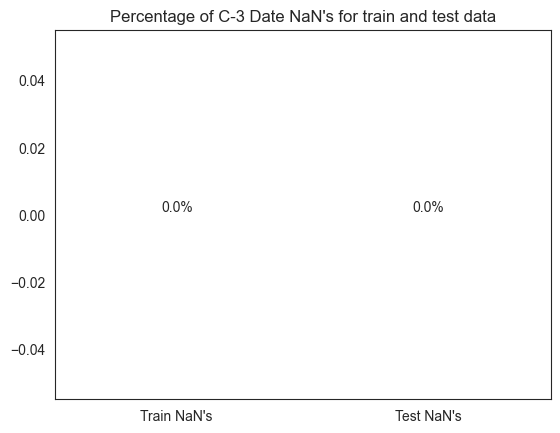

In [139]:
"""Number of NaN Values"""
df_train["Assembly Date"].isnull().sum()

sns.set_style("white")


assembly_date_train_na = df_train["Assembly Date"].isnull().sum()
assembly_date_test_na = df_test["Assembly Date"].isnull().sum()

total_values_train = len(df_train["Assembly Date"])
total_values_test = len(df_test["Assembly Date"])

fig, ax = plt.subplots()
x_values = ["Train NaN's ", "Test NaN's"]
bar_colours = ["tab:green", "tab:blue"]

y_values = [round((assembly_date_train_na/total_values_train)*100, 1), round((assembly_date_test_na/total_values_test)*100, 1)]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])
ax.set_title("Percentage of C-3 Date NaN's for train and test data")

plt.show()

In [132]:
"""Possible Hidden NaN values"""
df_train["Assembly Date"].unique()


array(['2020-01-01', '2020-01-02', '2020-01-03', ..., '2022-12-29',
       '2022-12-30', '2022-12-31'], dtype=object)

In [133]:
"""Changing format from string to datetime value"""
df_train["Assembly Date"] = pd.to_datetime(df_train["Assembly Date"], format='%Y-%m-%d')
df_test["Assembly Date"] = pd.to_datetime(df_test["Assembly Date"], format='%Y-%m-%d')


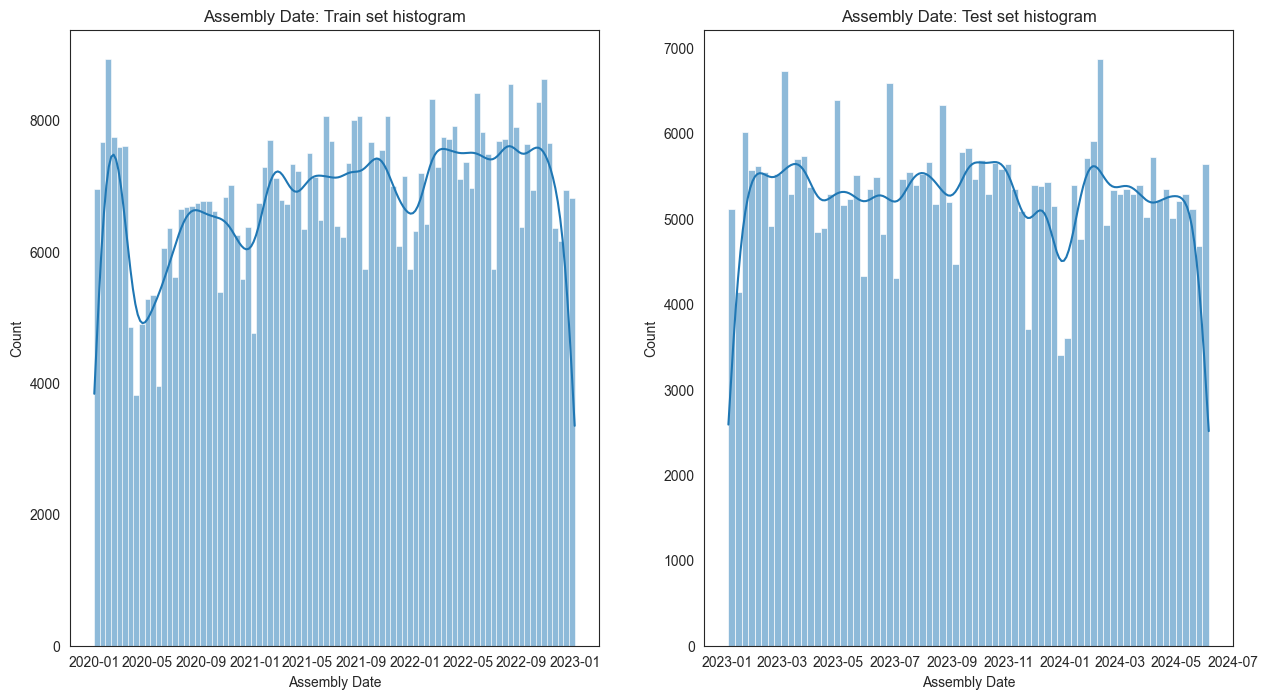

In [134]:
"""Histogram for both train and test data"""

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
sns.histplot(df_train["Assembly Date"], kde=True, ax=axes[0])
sns.histplot(df_test["Assembly Date"], kde=True, ax=axes[1])

axes[0].set_title("Assembly Date: Train set histogram")
axes[1].set_title("Assembly Date: Test set histogram")
plt.show()

Text(0.5, 1.0, 'Assembly Date: Boxplot Test set')

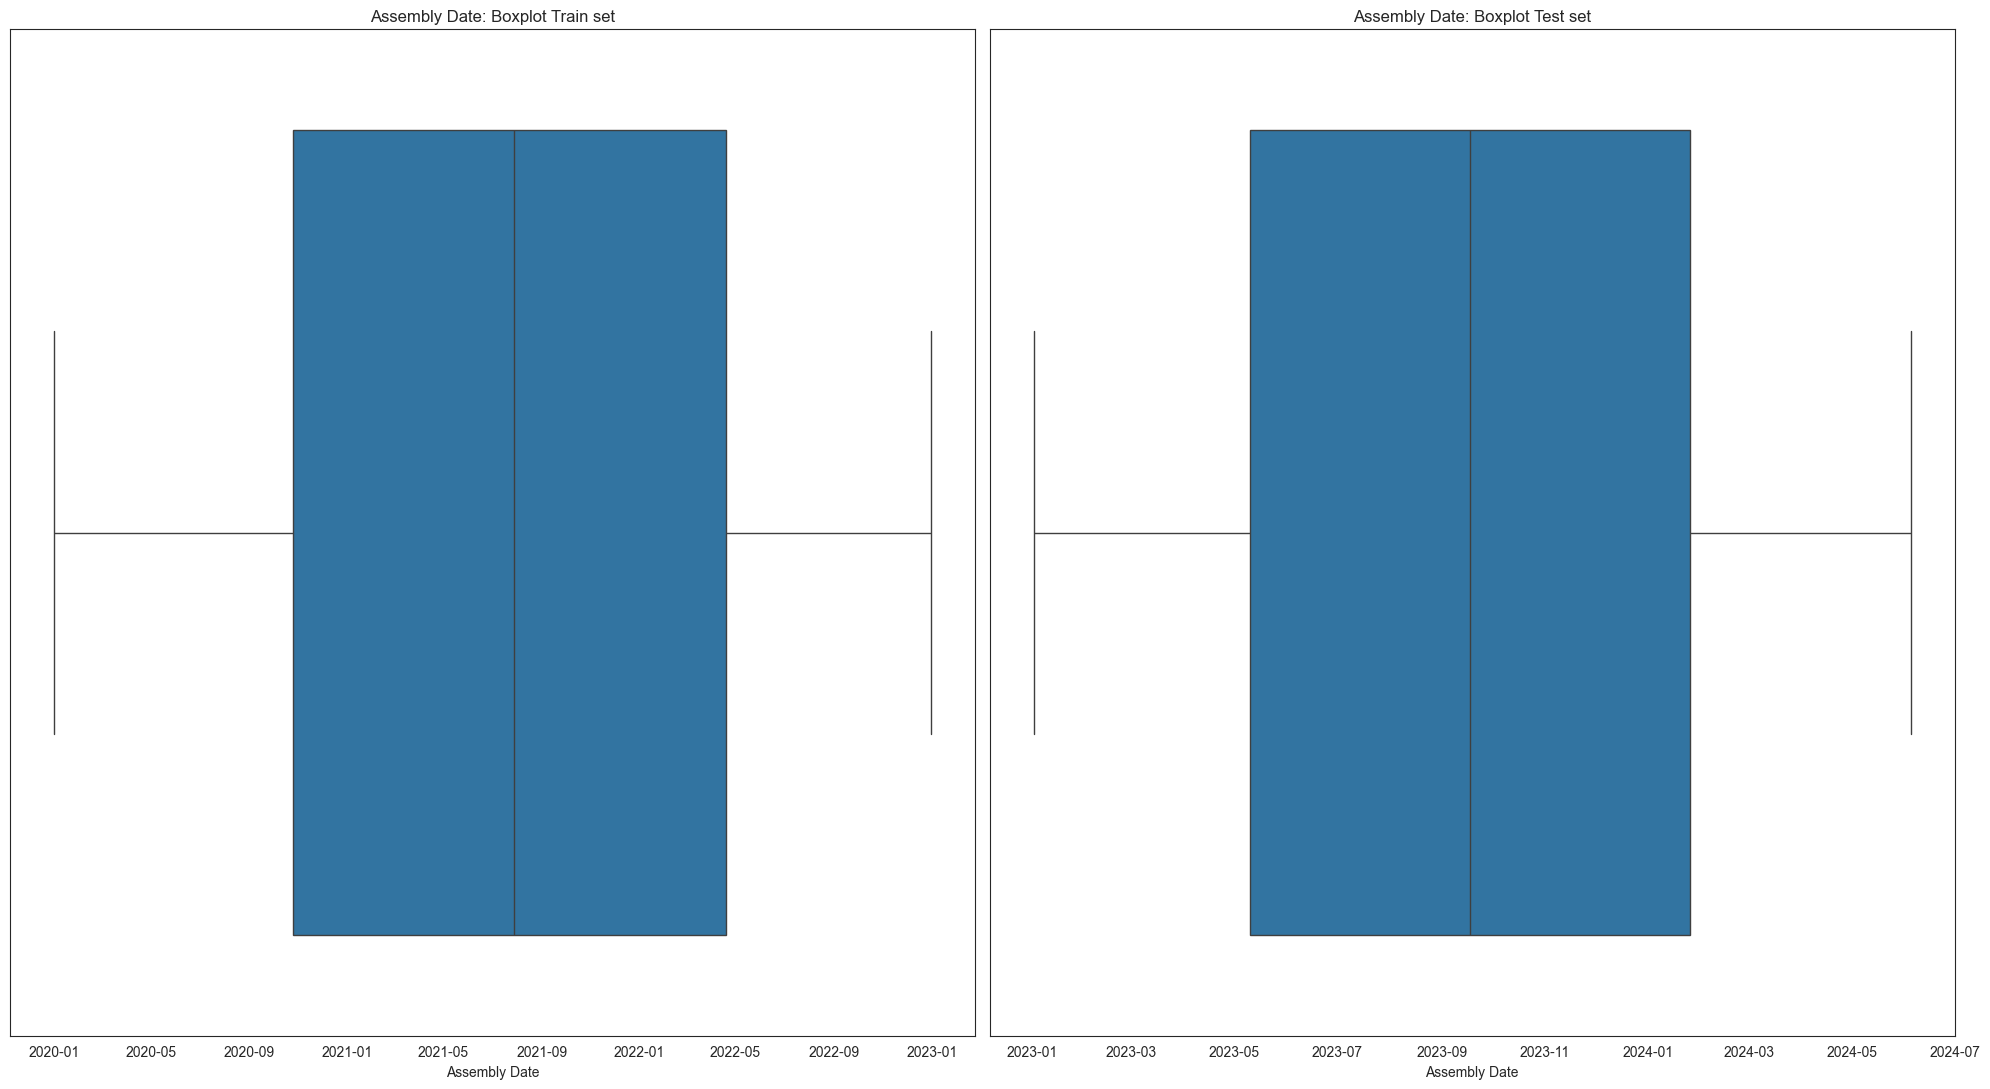

In [135]:
"""Boxplot for both train and test data"""

num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11),tight_layout=True)

sns.boxplot(x = df_train["Assembly Date"], ax=axes[0])
sns.boxplot(x = df_test["Assembly Date"], ax=axes[1])

axes[0].set_title("Assembly Date: Boxplot Train set")
axes[1].set_title("Assembly Date: Boxplot Test set")


/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/3672505037.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_train_resampled = df_train.resample('Y', on='Assembly Date').size()
/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/3672505037.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_test_resampled = df_test.resample('Y', on='Assembly Date').size()


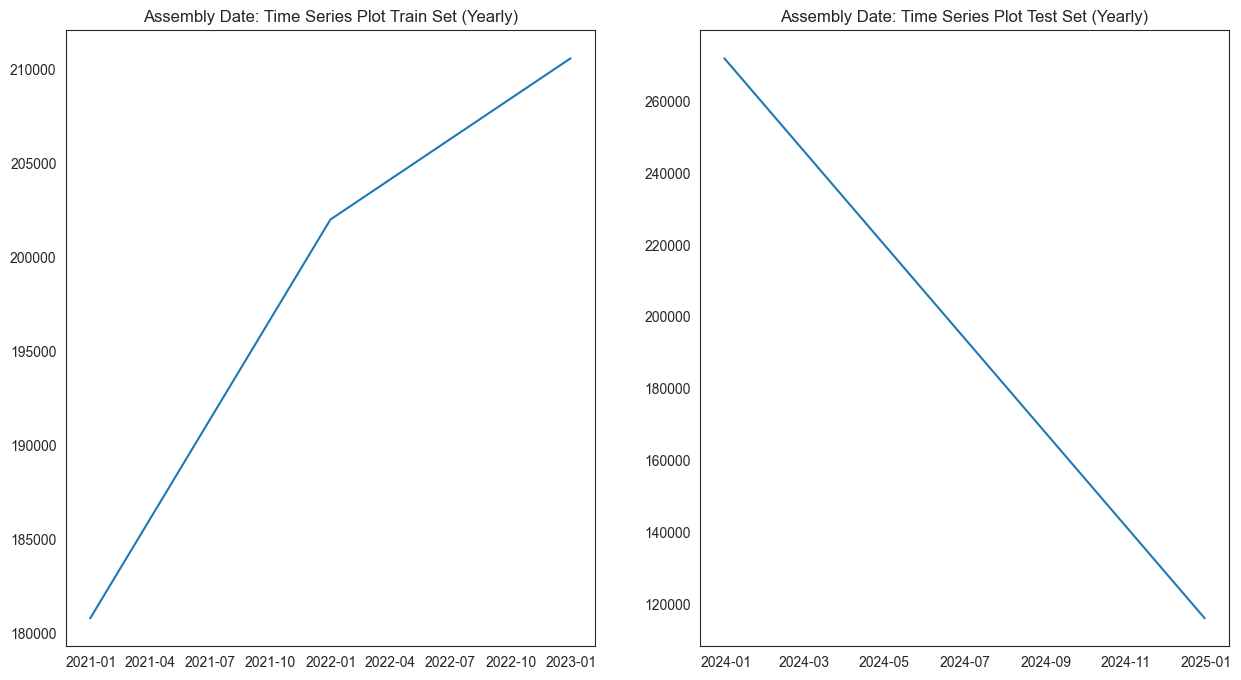

In [137]:
"""Creating time series plot and resamplyingin regards to year"""

# Resample by month and count the occurrences
df_train_resampled = df_train.resample('Y', on='Assembly Date').size()
df_test_resampled = df_test.resample('Y', on='Assembly Date').size()

# Plot the resampled data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

axes[0].plot(df_train_resampled.index, df_train_resampled)
axes[1].plot(df_test_resampled.index, df_test_resampled)

axes[0].set_title("Assembly Date: Time Series Plot Train Set (Yearly)")
axes[1].set_title("Assembly Date: Time Series Plot Test Set (Yearly)")

plt.show()


### Key notes on Assembly date
1. No NaN values on either the train and test data
2. No hidden NaN values
3. No apparent strange values (still need to compare with C-2, C-3 Date and Assembly Date)
4. Changed data format from object to datetime
5. Histogram and Boxplot on both training and test datasets indicate the presence of no outliers

In [ ]:
"""
Analyzing strange values
1. Assuming that the logical chronological order is Accident Date --> C-2 Date or C-3 Date --> Assembly Date --> First Hearing Date, 
let's check if for each case Accident date is smaller than the others
2. Can Only do this analysis after changing the dtype of all features
"""



## e) First Hearing Date

#### - Date when the initial hearing for a workers' compensation claim is scheduled, where the WCB may review the case or resolve disputes
#### - This means that in the train dataset we might find First Hearing Date  = 2025. Despite being assembled between 2020-2022 the First Hearing was schedule only for 2025

In [148]:
"""Undertanding the feature"""
df_train["First Hearing Date"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: First Hearing Date
Non-Null Count   Dtype 
--------------   ----- 
150798 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


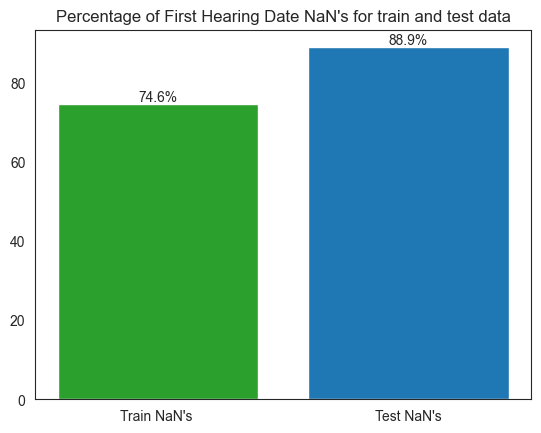

In [149]:
"""% of NaN Values"""
df_train["First Hearing Date"].isnull().sum()

sns.set_style("white")


fh_date_train_na = df_train["First Hearing Date"].isnull().sum()
fh_date_test_na = df_test["First Hearing Date"].isnull().sum()

total_values_train = len(df_train["First Hearing Date"])
total_values_test = len(df_test["First Hearing Date"])

fig, ax = plt.subplots()
x_values = ["Train NaN's ", "Test NaN's"]
bar_colours = ["tab:green", "tab:blue"]

y_values = [round((fh_date_train_na/total_values_train)*100, 1), round((fh_date_test_na/total_values_test)*100, 1)]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])
ax.set_title("Percentage of First Hearing Date NaN's for train and test data")

plt.show()

In [150]:
"""Possible Hidden NaN values"""
df_train["First Hearing Date"].unique()

array([nan, '2020-02-21', '2020-08-13', ..., '2024-02-22', '2023-05-24',
       '2024-03-20'], dtype=object)

In [151]:
"""Changing format from string to datetime value"""
df_train["First Hearing Date"] = pd.to_datetime(df_train["First Hearing Date"], format='%Y-%m-%d')
df_test["First Hearing Date"] = pd.to_datetime(df_test["First Hearing Date"], format='%Y-%m-%d')


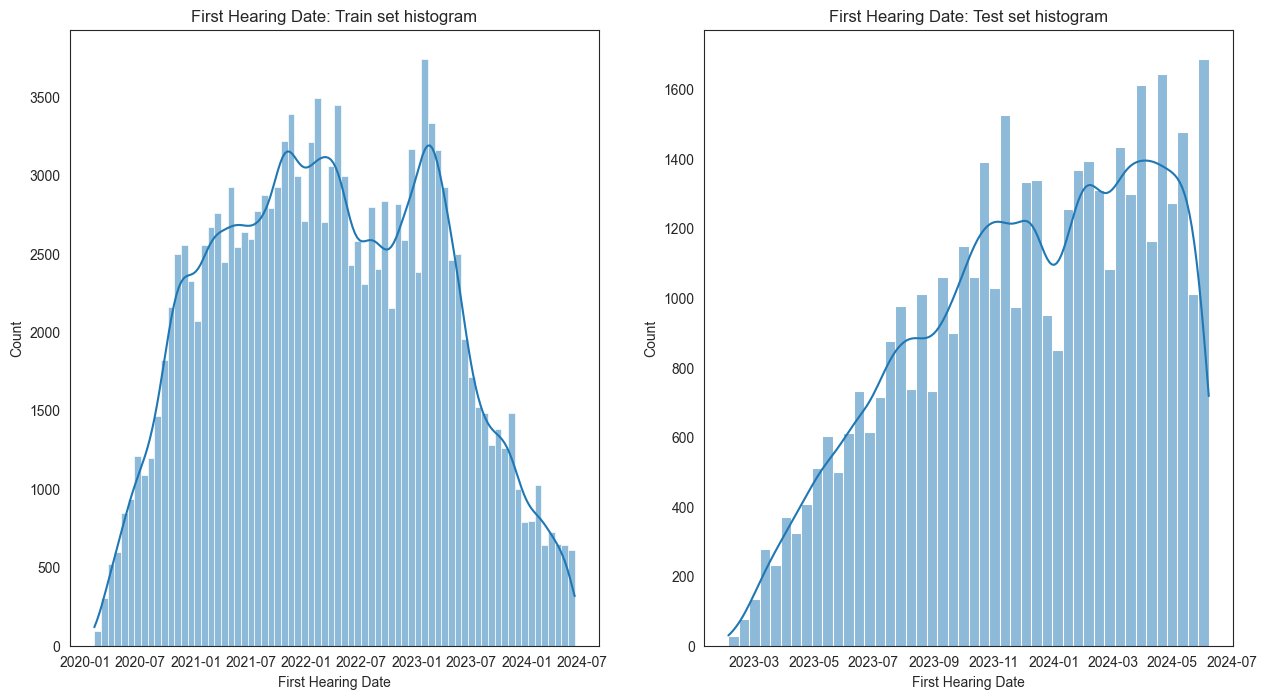

In [152]:
"""Histogram for both train and test data"""

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,8))
sns.histplot(df_train["First Hearing Date"], kde=True, ax=axes[0])
sns.histplot(df_test["First Hearing Date"], kde=True, ax=axes[1])

axes[0].set_title("First Hearing Date: Train set histogram")
axes[1].set_title("First Hearing Date: Test set histogram")
plt.show()

Text(0.5, 1.0, 'First Hearing Date: Boxplot Test set')

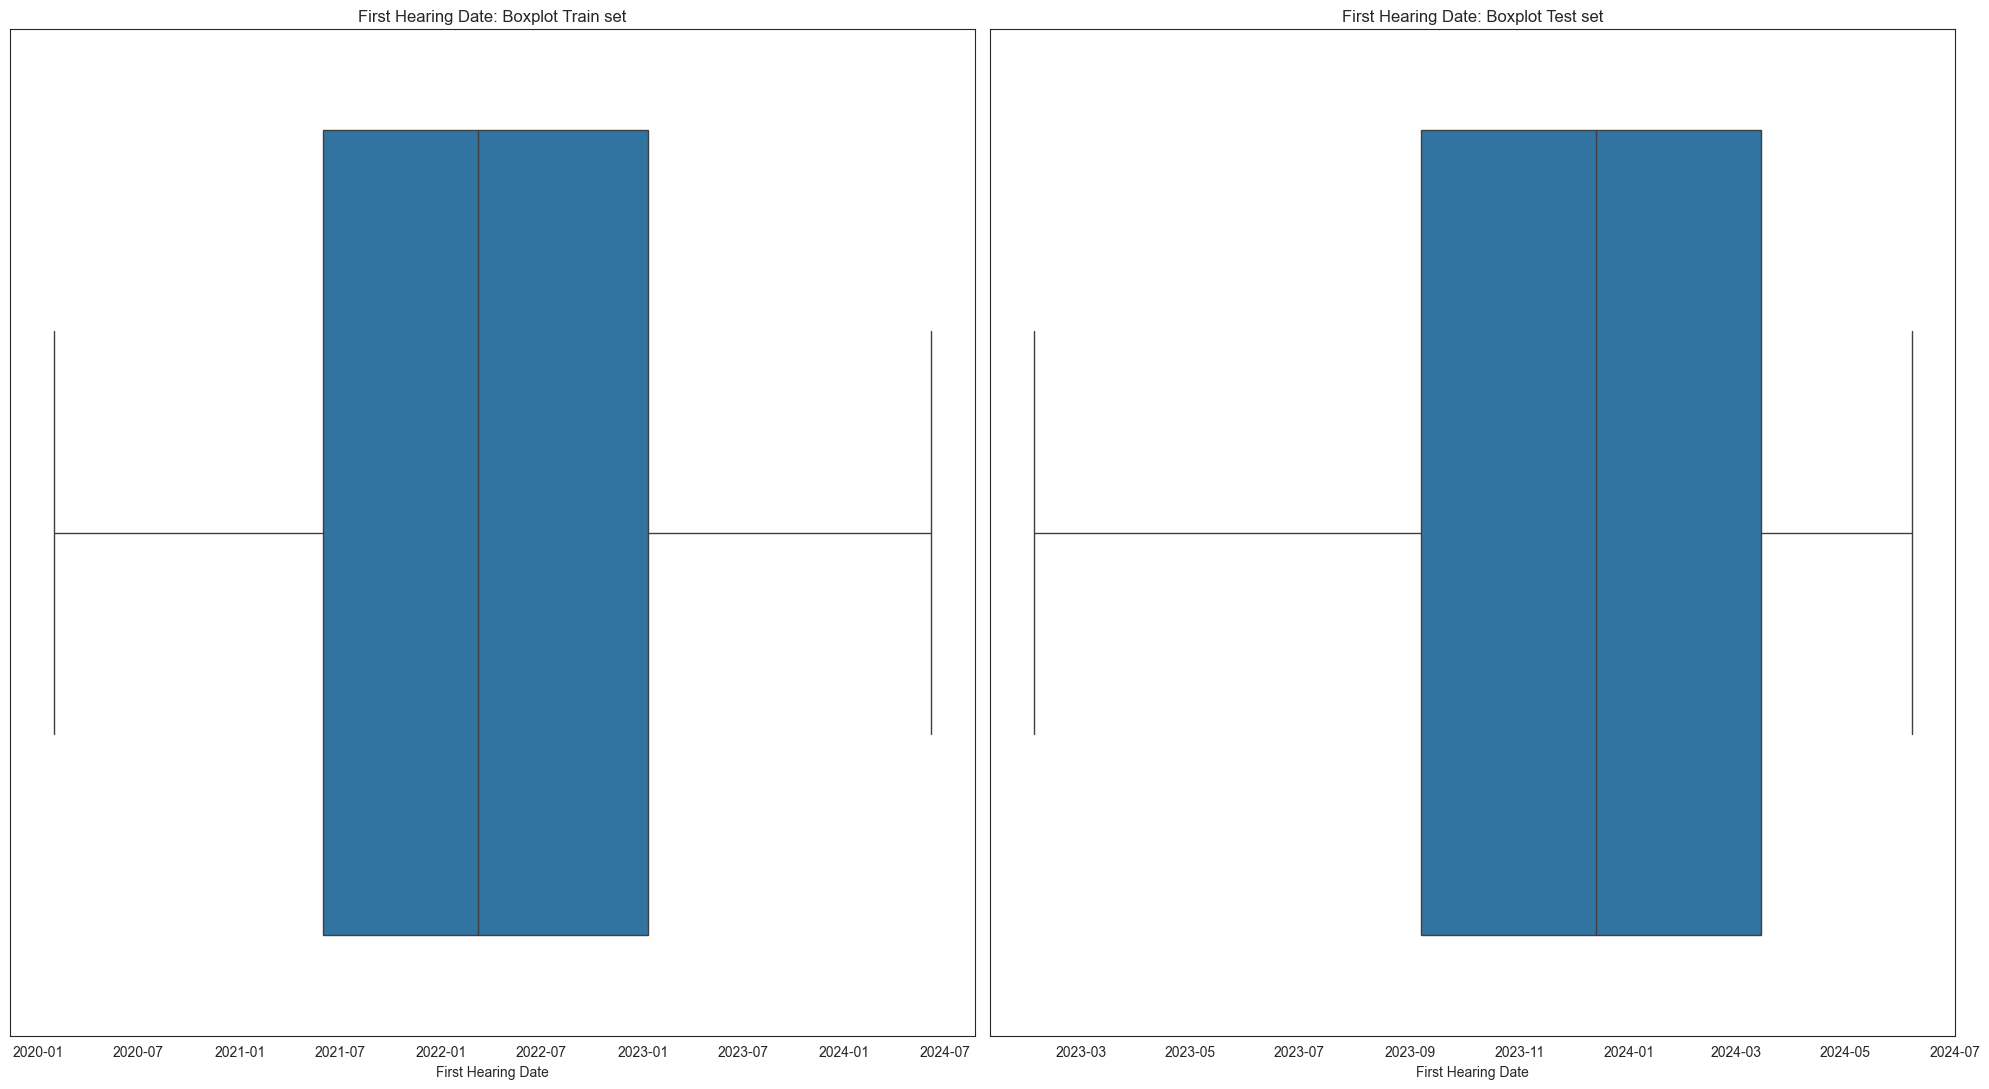

In [153]:
"""Boxplot for both train and test data"""

num_rows = 1
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11),tight_layout=True)

sns.boxplot(x = df_train["First Hearing Date"], ax=axes[0])
sns.boxplot(x = df_test["First Hearing Date"], ax=axes[1])

axes[0].set_title("First Hearing Date: Boxplot Train set")
axes[1].set_title("First Hearing Date: Boxplot Test set")


/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/1331989289.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_train_resampled = df_train.resample('Y', on='First Hearing Date').size()
/var/folders/ls/ymvgl5s56rs19sp6mvzp6w1c0000gn/T/ipykernel_54192/1331989289.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_test_resampled = df_test.resample('Y', on='First Hearing Date').size()


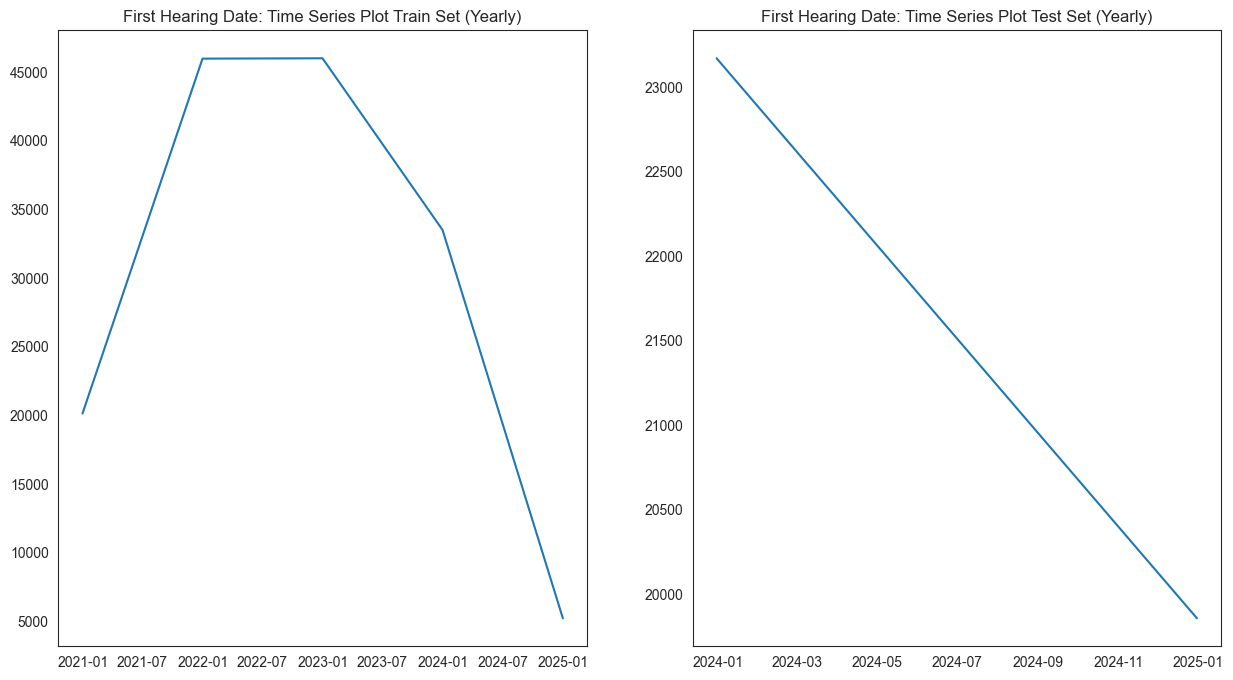

In [154]:
"""Creating time series plot and resamplying in regards to the year"""

# Resample by month and count the occurrences
df_train_resampled = df_train.resample('Y', on='First Hearing Date').size()
df_test_resampled = df_test.resample('Y', on='First Hearing Date').size()

# Plot the resampled data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

axes[0].plot(df_train_resampled.index, df_train_resampled)
axes[1].plot(df_test_resampled.index, df_test_resampled)

axes[0].set_title("First Hearing Date: Time Series Plot Train Set (Yearly)")
axes[1].set_title("First Hearing Date: Time Series Plot Test Set (Yearly)")

plt.show()


### Key notes on First Hearing date
1. Very High NaN values
2. No hidden NaN values
3. No apparent strange values (still need to compare with C-2, C-3 Date and Assembly Date)
4. Changed data format from object to datetime
5. Histogram and Boxplot:
- No outlier values
- test data seems to be more left skewed (values more concentrated after the end of 2023)

In [ ]:
"""
Analyzing strange values
1. Assuming that the logical chronological order is Accident Date --> C-2 Date or C-3 Date --> Assembly Date --> First Hearing Date, 
let's check if for each case Accident date is smaller than the others
2. Can Only do this analysis after changing the dtype of all features
"""



## f) OIICS Nature of Injury Description

In [158]:
"""Undertanding the feature"""
df_train["OIICS Nature of Injury Description"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: OIICS Nature of Injury Description
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 4.5 MB


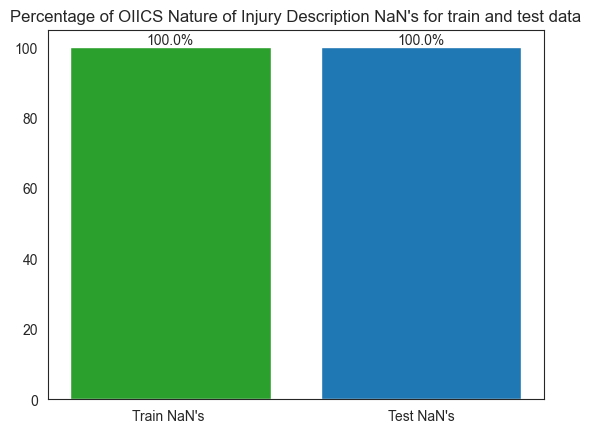

In [160]:
"""% of NaN Values"""
sns.set_style("white")


nid_train_na = df_train["OIICS Nature of Injury Description"].isnull().sum()
nid_test_na = df_test["OIICS Nature of Injury Description"].isnull().sum()

total_values_train = len(df_train["OIICS Nature of Injury Description"])
total_values_test = len(df_test["OIICS Nature of Injury Description"])

fig, ax = plt.subplots()
x_values = ["Train NaN's ", "Test NaN's"]
bar_colours = ["tab:green", "tab:blue"]

y_values = [round((nid_train_na/total_values_train)*100, 1), round((nid_test_na/total_values_test)*100, 1)]
p = ax.bar(x_values, y_values, color=bar_colours)
ax.bar_label(p, labels= [str(element) + "%" for element in y_values])
ax.set_title("Percentage of OIICS Nature of Injury Description NaN's for train and test data")

plt.show()

In [161]:
"""Based on the results above, it's quite clear that we will have to drop this column from both train and test datasets"""
df_train.drop(columns="OIICS Nature of Injury Description", inplace=True)
df_test.drop(columns="OIICS Nature of Injury Description", inplace=True)

## g) Claim Injury type (Categorical ordinal Target variable)
### Possible values
1. CANCELLED – Claim is cancelled if assembled in error or determined to be a duplicate
2. NON-COMP – No indemnity benefits awarded for the claim 
3. MED ONLY – Medical benefits only 
4. TEMPORARY – Claim is awarded temporary total or partial benefits for lost time
5. PPD SCH LOSS – Claim is awarded a Permanent Partial Scheduled Loss of Use Disability benefit involving a scheduled part(s) of body 
6. PPD NSL – Claim is awarded a Permanent Partial Non-Scheduled Loss Disability benefit for body part(s) such as neck or back
7. PTD – Claim is awarded benefits for a Permanent Total Disability
8. DEATH – Claim for death benefits filed under WCL §16 as a result of the death of a worker

In [162]:
"""Undertanding the feature"""
df_train["Claim Injury Type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 593471 entries, 0 to 593470
Series name: Claim Injury Type
Non-Null Count   Dtype 
--------------   ----- 
574026 non-null  object
dtypes: object(1)
memory usage: 4.5+ MB


In [173]:
"""% of NaN Values"""
target_na_values = df_train["Claim Injury Type"].isnull().sum()
per_target_na_values = round(target_na_values/len(df_train["Claim Injury Type"]),2)
print(f"Total of NaN values in the target variable is: {target_na_values} which corresponds to a NaN values % of {per_target_na_values}")

Total of NaN values in the target variable is: 19445 which corresponds to a NaN values % of 0.03


In [177]:
"""Trying to undertand the NaN values"""
df_train.loc[df_train["Claim Injury Type"].isnull()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
3,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593465,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593466,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593468,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
"""Possible Hidden NaN values"""
df_train["Claim Injury Type"].unique()

array(['2. NON-COMP', '4. TEMPORARY', nan, '3. MED ONLY',
       '5. PPD SCH LOSS', '6. PPD NSL', '1. CANCELLED', '8. DEATH',
       '7. PTD'], dtype=object)

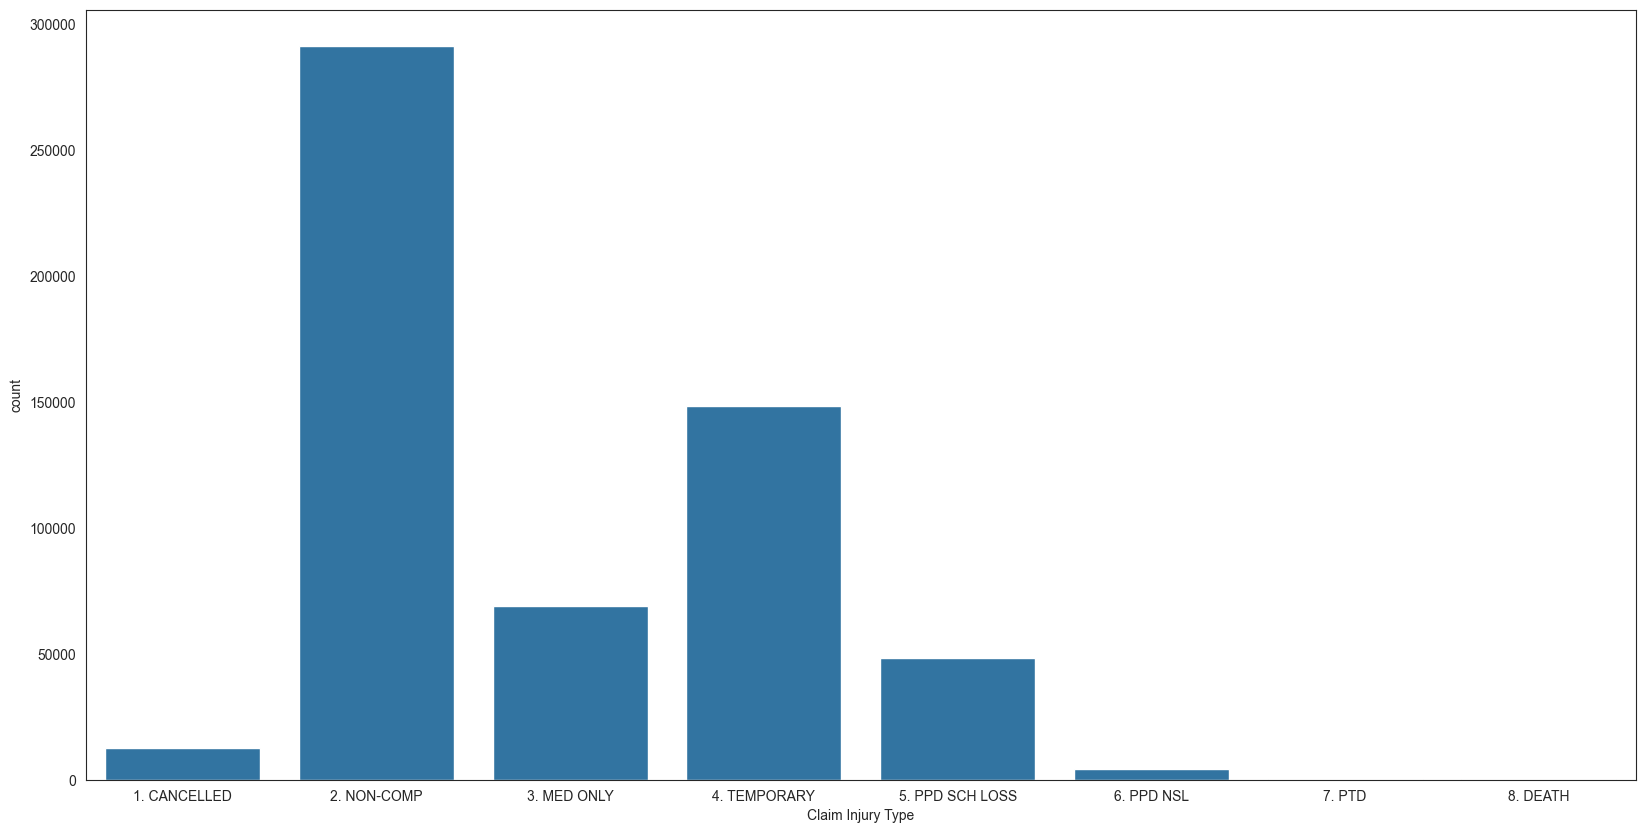

In [193]:
"""Since the target varible is categorical we will plot a bar plot instead of using the histogram or boxplot"""
fig,ax = plt.subplots(figsize = (20,10))

sns.countplot(x=df_train["Claim Injury Type"],
              order=["1. CANCELLED", "2. NON-COMP", "3. MED ONLY", "4. TEMPORARY", "5. PPD SCH LOSS", "6. PPD NSL", "7. PTD", "8. DEATH"],
             ax=ax)

plt.show()

In [195]:
"""Confirming that there are 0 CASES where Claim Injury Type is equal to 7.PTD or to 8.DEATH """
df_train.loc[ (df_train["Claim Injury Type"] == '7.PTD') | (df_train["Claim Injury Type"] == '8.DEATH')].shape[0]

0

In [196]:
df_train["Claim Injury Type"].describe()

count          574026
unique              8
top       2. NON-COMP
freq           291078
Name: Claim Injury Type, dtype: object

### Key notes on Claim Injury Type
1. 0.03% of NaN values. Should we remove the corresponding observation?
2. No hidden NaN values
3. Bar plot
- No values for the categories 7.PTD and to 8.DEATH 
- Most frequent class is 2. NON-COMP with 291,078 values 
- Potential outliers: 1. CANCELLED, 6, PPD NSL, 7.PTD and to 8.DEATH
4. Should we remove the 1. CANCELLED observations ? Since it corresponds to the claims that were cancelled due to error in assembly or determined to be a duplicate


## Key notes overall
1. Accident date (NA values: 4%, 0.6%, Outliers: YES)

 2. C-2 Date (NA values: 6%, 2% , Outliers: YES )

 3. C-3 Date (NA values: 68%, 78% , Outliers: YES )

 4. Assembly Date (NA values: 0%, 0%, Outliers: NO )

 5. First Hearing Date (NA values: 75%, 89% Outliers: NO )

 6. Claim Injury Type (NA values: 0.03%, Outliers: YES)


## <div style="color:yellow" > 1.2 Multivariate relationships (without preprocessing outliers or NaN values) </div> 


## a) Spliting Train dataset into numerical and categorical features


In [ ]:
"""Does it make sense to do the train_test_split to get the X_train and X_vali and then do the analyzis below ? I decided not to"""

In [220]:
"""Reviewing all the existing columns"""
df_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [263]:
"""Split training dataset into numerical and categorical variables """
#Split might be wrong

categorical_columns =["Alternative Dispute Resolution", "Attorney/Representative", "Carrier Name","Carrier Type", "County of Injury", "COVID-19 Indicator", "District Name", "Gender", "Industry Code",
                       "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Code" ,"WCIO Cause of Injury Description", "WCIO Nature of Injury Code", "WCIO Nature of Injury Description",
                       "WCIO Part Of Body Code", "WCIO Part Of Body Description", "Number of Dependents", "Zip Code"
                       ] 

X_train = df_train.drop('Claim Injury Type', axis = 1)
y = df_train['Claim Injury Type']

X_train_num = X_train.drop(columns=categorical_columns)
X_train_cat = X_train.loc[:, categorical_columns]

## b) Analyzing feature <u> redundancy </u>  between numerical features using the Spearman Correlation

In [267]:
"""Determining the Spearman correlation matrix between numerical variables"""

#1 Data Sacling using the MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(X_train_num)
for col in X_train_num.columns:
    X_train_num[col] = scaler.fit_transform(X_train_num[col].to_numpy().reshape(-1,1))


#X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
X_train_num_scaled = pd.DataFrame(X_train_num, columns = X_train_num.columns).set_index(X_train.index)

cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count
Accident Date,1.000000,-0.002886,0.891761,-0.006023,0.113791,0.925665,0.072691,0.765070,0.035928,-0.060663
Age at Injury,-0.002886,1.000000,-0.015505,0.132901,-0.870883,-0.009596,0.093356,-0.015480,0.113164,0.084839
Assembly Date,0.891761,-0.015505,1.000000,-0.035552,0.083988,0.885805,0.063032,0.931911,0.013285,-0.077962
Average Weekly Wage,-0.006023,0.132901,-0.035552,1.000000,-0.096111,0.013858,0.426157,-0.035669,0.515314,-0.027448
Birth Year,0.113791,-0.870883,0.083988,-0.096111,1.000000,0.093313,-0.094486,0.084062,-0.100589,-0.079677
C-2 Date,0.925665,-0.009596,0.885805,0.013858,0.093313,1.000000,0.097886,0.761142,0.082597,-0.099716
C-3 Date,0.072691,0.093356,0.063032,0.426157,-0.094486,0.097886,1.000000,0.021520,0.508067,0.020177
Claim Identifier,0.765070,-0.015480,0.931911,-0.035669,0.084062,0.761142,0.021520,1.000000,-0.021235,-0.077801
First Hearing Date,0.035928,0.113164,0.013285,0.515314,-0.100589,0.082597,0.508067,-0.021235,1.000000,0.145236
IME-4 Count,-0.060663,0.084839,-0.077962,-0.027448,-0.079677,-0.099716,0.020177,-0.077801,0.145236,1.000000


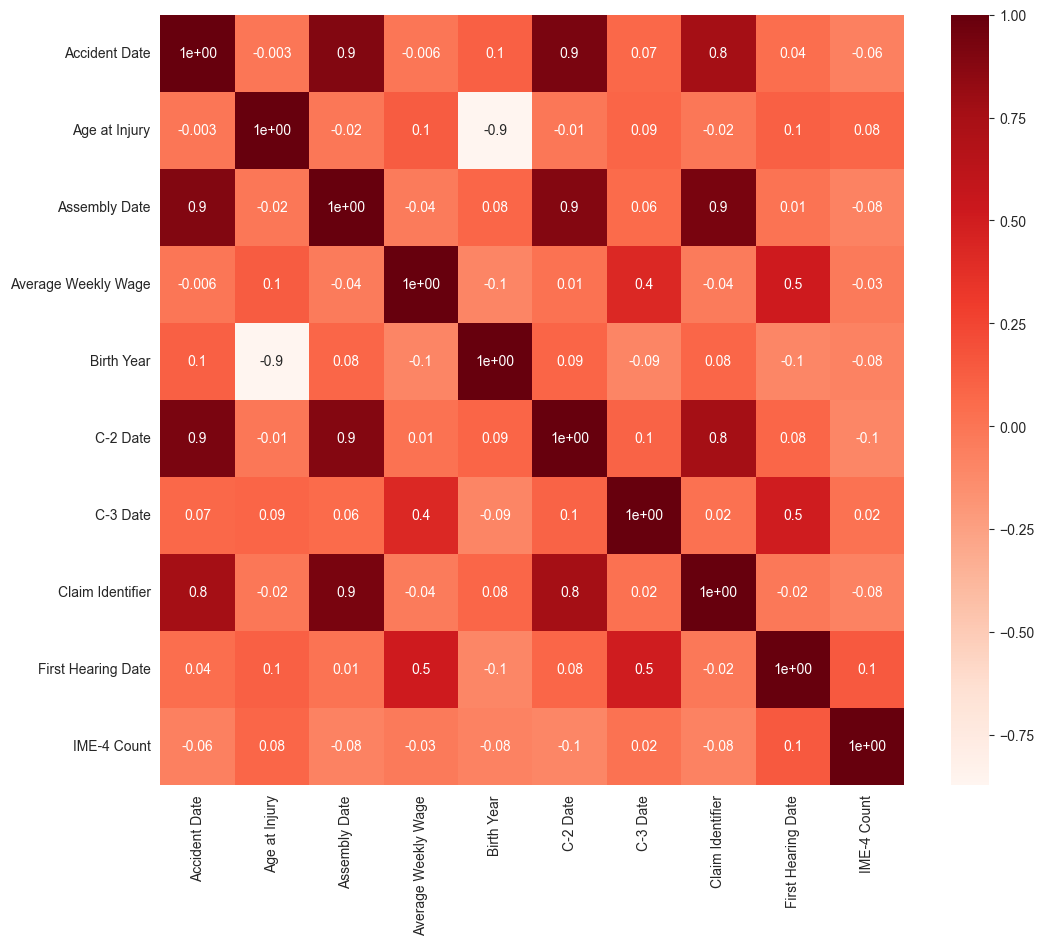

In [268]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()


cor_heatmap(cor_spearman)

## Key notes overall
After analyzing the correlation matrix above, we have the following main candidates for removal:
1. Accident Date
2. Claim Identifier
3. Assembly Date
4. C-2 Date

<img src="/Users/joaohenriques/Desktop/Mestrados/Data Science Nova IMS/My docs/Machine Learning/Project/project_data/Spearman_conclusion.jpeg" alt="Drawing" style="width: 500px;"/>


## b) Analyzing feature <u> relevance</u> between numerical features and target variable using ANOVA or Kendal's test

TO DO 

## c) How to analyze feature <u> redundancy </u>  between categorical features ?

## d) Analyzing feature <u>relevance</u> between categorical features and target variable using Chi-Squared test

## <div style="color:yellow" > 1.3 Preprocessing activities </div>


In [269]:
"""
Suggestions:
1. As first attempt to create model, simply eliminate all the otliers
2. In my opinion, the following features should be removed due to high value of NaN values on both train and test datasets:
 - OIICS Nature of Injury Description (100%, 100%)
 - First Hearing Date (75%, 89%)
 - C-3 Date (68%, 78%)

 Maybe I should dedicate more time to exploring the possibility of inputing these missing values? Do we have the information in other columns?

 3. Data Scaling (MinMax) applied above in 1.2

"""

'\nSuggestions:\n1. As first attempt to create model, simply eliminate all the otliers\n2. In my opinion, the following features should be removed due to high value of NaN values on both train and test datasets:\n - OIICS Nature of Injury Description (100%, 100%)\n - First Hearing Date (75%, 89%)\n - C-3 Date (68%, 78%)\n\n Maybe I should dedicate more time to exploring the possibility of inputing these missing values? Do we have the information in other columns?\n\n 3. Data Scaling (MinMax) applied above in 1.2\n\n'